#Introduction to Natural Language Processing with PyTorch

In this module, we will explore different neural network architectures for dealing with natural language texts. In the recent years, Natural Language Processing (NLP) has experienced fast growth primarily due to the performance of the language models’ ability to accurately "understand" human language faster while using unsupervised training on large text corpora. We will learn about different NLP techniques such as using bag-of-words (BoW), word embeddings and recurrent neural networks for classifying text from news headlines to one of the 4 categories (World, Sports, Business and Sci-Tech).

Learning objectives
In this module you will:

* Understand how text is processed for natural language processing tasks
* Get introduced to using Recurrent Neural Networks (RNNs) and * Generative Neural Networks (GNNs)
* Learn how to build text classification models
* Prerequisites
* Basic Python knowledge
* Basic knowledge about how to use Jupyter Notebooks
* Basic understanding of machine learning
* This module is part of these learning paths
* PyTorch Fundamentals




Orginal Source - https://docs.microsoft.com/en-us/learn/modules/intro-natural-language-processing-pytorch/

#Introduction

In this module, we will explore different neural network architectures for dealing with natural language texts. In the recent years, Natural Language Processing (NLP) has experienced fast growth primarily due to the performance of the language models’ ability to accurately "understand" human language faster while using unsupervised training on large text corpora. For instance, sentence generation using GPT-3 or pre-trained text models such as BERT simplified many NLP tasks, and dramatically improved the performance.

We will focus on the fundamental aspects of representing NLP as tensors in PyTorch, and on classical NLP architectures such as using bag-of-words (BoW), word embeddings, recurrent neural networks and generative networks.

# Natural Language Tasks
There are several NLP tasks that we traditionally try to solve using neural networks:

##Text Classification
 is used when we need to classify text fragment into one of several pre-defined classes. Examples include e-mail spam detection, news categorization, assigning support request to one of the categories, and more.
Intent Classification is one specific case of text classification, when we want to map input utterance in the conversational AI system into one of the intents that represent the actual meaning of the phrase, or intent of the user.
Sentiment Analysis is a regression task, where we want to understand the degree of negativity of given piece of text. We may want to label texts in a dataset from the most negative (-1) to most positive ones (+1), and train a model that will output a number of "positiveness" of a text.
Named Entity Recognition (NER) is a task of extracting some entities from text, such as dates, addresses, people names, etc. Together with intent classification, NER is often used in dialog systems to extract parameters from user's utterance.
A similar task of keyword extraction can be used to find the most meaningful words inside a text, which can then be used as tags.
Text Summarization extracts the most meaningful pieces of text, giving a user a compressed version that contains most of the meaning.

## Question/Answer 
is a task of extracting an answer from a piece of text. This model gets text fragment and a question as an input, and needs to find exact place within the text that contains answer. For example, the text "John is a 22 year old student who loves to use Microsoft Learn", and the question How old is John should provide us with the answer 22.

For the scope of this module, we will mostly focus on the text classification task. We'll use text from news headlines to classify which one of the 4 categories they belong to: World, Sports, Business and Sci/Tech. We will also introduce generative models that can self produce human-like text sequences.

##Learning objectives
In this module you will:

* Understand how text is processed for natural language processing tasks
* Get introduced to using Recurrent Neural Networks (RNNs) and * * * Generative Networks
* Learn how to build text classification models
* Prerequisites
* Basic Python knowledge
* Basic knowledge about how to use Jupyter Notebooks
* Basic understanding of machine learning
* Next unit: Representing text as Tensors

#Representing text
If we want to solve Natural Language Processing (NLP) tasks with neural networks, we need some way to represent text as tensors. Computers already represent textual characters as numbers that map to fonts on your screen using encodings such as ASCII or UTF-8.

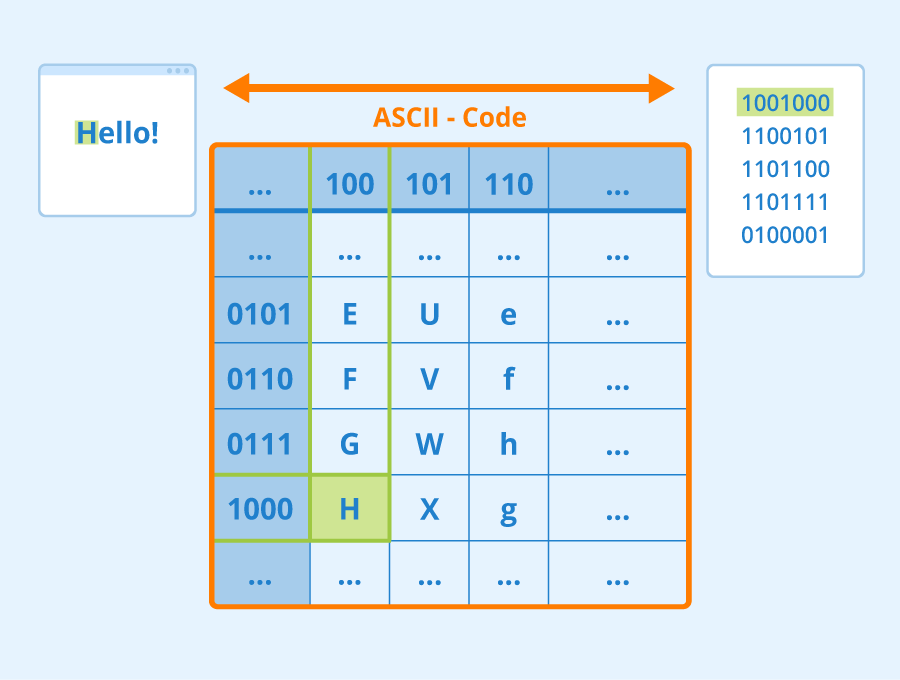

# Understand what each letter represents, 
and how all characters come together to form the words of a sentence. However, computers by themselves do not have such an understanding, and a neural network has to learn the meaning during training.

Therefore, we can use different approaches when representing text:

Character-level representation, when we represent text by treating each character as a number. Given that we have  
C
  different characters in our text corpus, the word Hello would be represented by  
5
×
C
  tensor. Each letter would correspond to a tensor column in one-hot encoding.
Word-level representation, when we create a vocabulary of all words in our text sequence or sentence(s), and then represent each word using one-hot encoding. This approach is somehow better, because each letter by itself does not have much meaning, and thus by using higher-level semantic concepts - words - we simplify the task for the neural network. However, given a large dictionary size, we need to deal with high-dimensional sparse tensors. For example, if we have a vocabulary size of 10,000 different words. Then each word would have an one-hot encoding length of 10,000; hence the high-dimensional.
To unify those approaches, we typically call an atomic piece of text a token. In some cases tokens can be letters, in other cases - words, or parts of words.

## Example
for example, we can choose to tokenize indivisible as in-divis-ible, where the # sign represents that the token is a continuation of the previous word. This would allow the root divis to always be represented by one token, corresponding to one core meaning.
The process of converting text into a sequence of tokens is called tokenization. Next, we need to assign each token to a number, which we can feed into a neural network. This is called vectorization, and is normally done by building a token vocabulary.

Let's start by installing some required Python packages we'll use in this module.

In [ ]:
!pip install -r https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/nlp-pytorch/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.2 MB 1.5 MB/s 
     |████████████████████████████████| 1.4 MB 28.0 MB/s 
     |████████████████████████████████| 20.1 MB 1.2 MB/s 
     |████████████████████████████████| 50.4 MB 35 kB/s 
     |████████████████████████████████| 1.9 MB 48.5 MB/s 
     |████████████████████████████████| 17.4 MB 39.1 MB/s 
     |████████████████████████████████| 1.9 MB 60.2 MB/s 
     |████████████████████████████████| 804.1 MB 2.6 kB/s 
     |████████████████████████████████| 880 kB 62.4 MB/s 
     |████████████████████████████████| 3.3 MB 44.0 MB/s 
     |████████████████████████████████| 1.9 MB 56.8 MB/s 
     |████████████████████████████████| 8.0 MB 31.9 MB/s 
     |████████████████████████████████| 8.0 MB 31.7 MB/s 
     |████████████████████████████████| 8.0 MB 18.1 MB/s 
     |████████████████████████████████| 7.6 MB 54.5 MB/s 
     |████████████████████████

## Text classification task
In this module, we will start with a simple text classification task based on AG_NEWS sample dataset, which is to classify news headlines into one of 4 categories: World, Sports, Business and Sci/Tech. This dataset is built from PyTorch's torchtext module, so we can easily access it.

In [ ]:
import torch
import torchtext
import os
import collections

os.makedirs('./data',exist_ok=True)
train_dataset, test_dataset = torchtext.datasets.AG_NEWS(root='./data')
classes = ['World', 'Sports', 'Business', 'Sci/Tech']

Here, train_dataset and test_dataset contain iterators that return pairs of label (number of class) and text respectively, for example:

In [ ]:
next(train_dataset)

(3,
 "Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again.")

So, let's print out the first 5 new headlines from our dataset:

In [ ]:
for i,x in zip(range(5),train_dataset):
    print(f"**{classes[x[0]]}** -> {x[1]}\n")

**Sci/Tech** -> Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.

**Sci/Tech** -> Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.

**Sci/Tech** -> Iraq Halts Oil Exports from Main Southern Pipeline (Reuters) Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday.

**Sci/Tech** -> Oil prices soar to all-time record, posing new menace to US economy (AFP) AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace

Because datasets are iterators, if we want to use the data multiple times we need to convert it to a list:

In [ ]:
train_dataset, test_dataset = torchtext.datasets.AG_NEWS(root='./data')
train_dataset = list(train_dataset)
test_dataset = list(test_dataset)

test_dataset

[(3,
  "Fears for T N pension after talks Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul."),
 (4,
  'The Race is On: Second Private Team Sets Launch Date for Human Spaceflight (SPACE.com) SPACE.com - TORONTO, Canada -- A second\\team of rocketeers competing for the  #36;10 million Ansari X Prize, a contest for\\privately funded suborbital space flight, has officially announced the first\\launch date for its manned rocket.'),
 (4,
  'Ky. Company Wins Grant to Study Peptides (AP) AP - A company founded by a chemistry researcher at the University of Louisville won a grant to develop a method of producing better peptides, which are short chains of amino acids, the building blocks of proteins.'),
 (4,
  "Prediction Unit Helps Forecast Wildfires (AP) AP - It's barely dawn when Mike Fitzpatrick starts his shift with a blur of colorful maps, figures and endless charts, but already he knows what the day will bring. 

# Tokenization and Vectorization
Now we need to convert text into numbers that can be represented as tensors to feed them into a neural network. The first step is to convert text to tokens - tokenization. If we use word-level representation, each word would be represented by its own token. We will use build-in tokenizer from torchtext module:

In [ ]:
tokenizer = torchtext.data.utils.get_tokenizer('basic_english')

We'll use PyTorch's tokenizer to split words and spaces in the first 2 news articles. In our case, we use basic_english for the tokenizer to understand the language structure. This will return a string list of the text and characters.

In [ ]:
first_sentence = train_dataset[0][1]
second_sentence = train_dataset[1][1]

f_tokens = tokenizer(first_sentence)
s_tokens = tokenizer(second_sentence)

print(f'\nfirst token list:\n{f_tokens}')
print(f'\nsecond token list:\n{s_tokens}')


first token list:
['wall', 'st', '.', 'bears', 'claw', 'back', 'into', 'the', 'black', '(', 'reuters', ')', 'reuters', '-', 'short-sellers', ',', 'wall', 'street', "'", 's', 'dwindling\\band', 'of', 'ultra-cynics', ',', 'are', 'seeing', 'green', 'again', '.']

second token list:
['carlyle', 'looks', 'toward', 'commercial', 'aerospace', '(', 'reuters', ')', 'reuters', '-', 'private', 'investment', 'firm', 'carlyle', 'group', ',', '\\which', 'has', 'a', 'reputation', 'for', 'making', 'well-timed', 'and', 'occasionally\\controversial', 'plays', 'in', 'the', 'defense', 'industry', ',', 'has', 'quietly', 'placed\\its', 'bets', 'on', 'another', 'part', 'of', 'the', 'market', '.']



Next, to convert text to numbers, we will need to build a vocabulary of all tokens. We first build the dictionary using the Counter object, and then create a Vocab object that would help us deal with vectorization:

In [ ]:
counter = collections.Counter()

for (label, line) in train_dataset:
    counter.update(tokenizer(line))
    
vocab = torchtext.vocab.Vocab(counter, min_freq=1)

To see how each word maps to the vocabulary, we'll loop through each word in the list to lookup it's index number in vocab. Each word or character is displayed with it's corresponding index. For example, word 'the' appears several times in both sentence and it's unique index in the vocab is the number 3.

In [ ]:
word_lookup = [list((vocab[w], w)) for w in f_tokens]
print(f'\nIndex lockup in 1st sentence:\n{word_lookup}')

word_lookup = [list((vocab[w], w)) for w in s_tokens]
print(f'\nIndex lockup in 2nd sentence:\n{word_lookup}')


Index lockup in 1st sentence:
[[432, 'wall'], [426, 'st'], [2, '.'], [1606, 'bears'], [14839, 'claw'], [114, 'back'], [67, 'into'], [3, 'the'], [849, 'black'], [14, '('], [28, 'reuters'], [15, ')'], [28, 'reuters'], [16, '-'], [50726, 'short-sellers'], [4, ','], [432, 'wall'], [375, 'street'], [17, "'"], [10, 's'], [67508, 'dwindling\\band'], [7, 'of'], [52259, 'ultra-cynics'], [4, ','], [43, 'are'], [4010, 'seeing'], [784, 'green'], [326, 'again'], [2, '.']]

Index lockup in 2nd sentence:
[[15875, 'carlyle'], [1073, 'looks'], [855, 'toward'], [1311, 'commercial'], [4251, 'aerospace'], [14, '('], [28, 'reuters'], [15, ')'], [28, 'reuters'], [16, '-'], [930, 'private'], [798, 'investment'], [321, 'firm'], [15875, 'carlyle'], [99, 'group'], [4, ','], [27658, '\\which'], [29, 'has'], [6, 'a'], [4460, 'reputation'], [12, 'for'], [565, 'making'], [52791, 'well-timed'], [9, 'and'], [80618, 'occasionally\\controversial'], [2126, 'plays'], [8, 'in'], [3, 'the'], [526, 'defense'], [242, 'indus

Using vocabulary, we can easily encode our tokenized string into a set of numbers. Let's use the first news article as an example:

In [ ]:
vocab_size = len(vocab)
print(f"Vocab size of {vocab_size}")

def encode(x):
    return [vocab.stoi[s] for s in tokenizer(x)]

vec = encode(first_sentence)
print(vec)

Vocab size of 95812
[432, 426, 2, 1606, 14839, 114, 67, 3, 849, 14, 28, 15, 28, 16, 50726, 4, 432, 375, 17, 10, 67508, 7, 52259, 4, 43, 4010, 784, 326, 2]



In this code, the torchtext vocab.stoi dictionary allows us to convert from a string representation into numbers (the name stoi stands for "from string to integers). To convert the text back from a numeric representation into text, we can use the vocab.itos dictionary to perform reverse lookup:

In [ ]:
def decode(x):
    return [vocab.itos[i] for i in x]

decode(vec)

['wall',
 'st',
 '.',
 'bears',
 'claw',
 'back',
 'into',
 'the',
 'black',
 '(',
 'reuters',
 ')',
 'reuters',
 '-',
 'short-sellers',
 ',',
 'wall',
 'street',
 "'",
 's',
 'dwindling\\band',
 'of',
 'ultra-cynics',
 ',',
 'are',
 'seeing',
 'green',
 'again',
 '.']

# BiGrams, TriGrams and N-Grams
One limitation of word tokenization is that some words are part of multi word expressions, for example, the word 'hot dog' has a completely different meaning than the words 'hot' and 'dog' in other contexts. If we represent words 'hot` and 'dog' always by the same vectors, it can confuse the model.

To address this, N-gram representations are sometimes used in document classification, where the frequency of each word, bi-word or tri-word is a useful feature for training classifiers.

In bigram representation, for example, we will add all word pairs to the vocabulary, in addition to original words.
To get n-gram representation, we can use ngrams_iterator function that will convert the sequence of tokens to the sequence of n-grams. In the code below, we will build bigram vocabulary from our news dataset:

In [ ]:
from torchtext.data.utils import ngrams_iterator

bi_counter = collections.Counter()
for (label, line) in train_dataset:
    bi_counter.update(ngrams_iterator(tokenizer(line),ngrams=2))
bi_vocab = torchtext.vocab.Vocab(bi_counter, min_freq=2)

print(f"Bigram vocab size = {len(bi_vocab)}")

Bigram vocab size = 481971


In [ ]:
def encode(x):
    return [bi_vocab.stoi[s] for s in tokenizer(x)]

encode(first_sentence)

[572,
 564,
 2,
 2326,
 49106,
 150,
 88,
 3,
 1143,
 14,
 32,
 15,
 32,
 16,
 443749,
 4,
 572,
 499,
 17,
 10,
 0,
 7,
 468770,
 4,
 52,
 7019,
 1050,
 442,
 2]

The main drawback of N-gram approach is that vocabulary size starts to grow extremely fast. Here we specify min_freq flag to Vocab constructor in order to avoid those tokens that appear in the text only once. We can also increase min_freq even further, because infrequent words/phrases usually have little effect on the accuracy of classification.

Note: Try setting set min_freq parameter to a higher value, and observe the length of vocabulary change.
In practice, n-gram vocabulary size is still too high to represent words as one-hot vectors, and thus we need to combine this representation with some dimensionality reduction techniques, such as embeddings, which we will discuss in a later unit.

<br/>

#Feeding text into neural network
We have learnt how to represent each word by a number. Now, to build text classification model, we need to feed the whole sentence (or whole news article) into a neural network. The problem here is that each article/sentence has variable length; and all fully-connected or convolution neural networks deal with fixed input size. There are two ways we can handle this problem:

Find a way to collapse a sentence into fixed-length vector. In the next unit we will see how Bag-of-Words and TF-IDF representations help us to do that.
Design special neural network architectures that can deal with variable length sequences. We'll learn how Recurrent neural networks (RNN) for sequence modeling are implemented later in this module.


#Bag-of-Words and TF-IDF representations
In the previous unit, we have learnt to represent text by numbers. In this unit, we'll explore some of the approaches to feeding variable-length text into a neural network to collapse the input sequence into a fixed-length vector, which can then be used in the classifier.

To begin with, let's load our AG News dataset and build the vocabulary, we we have done in the previous unit. To make things shorter, all those operations are combined into load_dataset function of the accompanying Python module:

In [ ]:
!pip install -r https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/nlp-pytorch/requirements.txt
!wget -q https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/nlp-pytorch/torchnlp.py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.2 MB 1.4 MB/s 
     |████████████████████████████████| 1.4 MB 48.3 MB/s 
     |████████████████████████████████| 20.1 MB 1.1 MB/s 
     |████████████████████████████████| 50.4 MB 62 kB/s 
     |████████████████████████████████| 1.9 MB 53.3 MB/s 
     |████████████████████████████████| 17.4 MB 42.5 MB/s 
     |████████████████████████████████| 1.9 MB 54.4 MB/s 
     |████████████████████████████████| 804.1 MB 2.6 kB/s 
     |████████████████████████████████| 3.3 MB 48.9 MB/s 
     |████████████████████████████████| 880 kB 42.6 MB/s 
     |████████████████████████████████| 1.9 MB 46.9 MB/s 
     |████████████████████████████████| 8.0 MB 52.0 MB/s 
     |████████████████████████████████| 8.0 MB 57.1 MB/s 
     |████████████████████████████████| 8.0 MB 57.8 MB/s 
     |████████████████████████████████| 7.6 MB 56.2 MB/s 
     |████████████████████████

In [ ]:
import torch
import torchtext
import os
import collections
from torchnlp import *
train_dataset, test_dataset, classes, vocab = load_dataset()
vocab_size = len(vocab)
print("Vocab size = ",vocab_size)

Loading dataset...
Building vocab...
Vocab size =  95812



#Bag of Words text representation
Because words represent meaning, sometimes we can figure out the meaning of a text by just looking at the individual words, regardless of their order in the sentence. For example, when classifying news, words like weather, snow are likely to indicate weather forecast, while words like stocks, dollar would count towards financial news.

Bag of Words (BoW) vector representation is the most commonly used traditional vector representation. Each word is linked to a vector index, vector element contains the number of occurrences of a word in a given document.

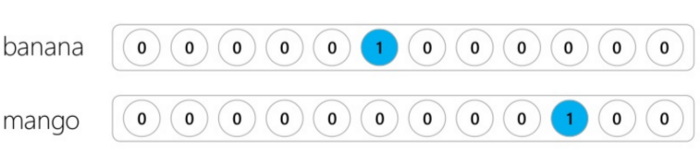

In [ ]:
def to_bow(text,bow_vocab_size=vocab_size):
    res = torch.zeros(bow_vocab_size,dtype=torch.float32)
    for i in encode(text):
        if i<bow_vocab_size:
            res[i] += 1
    return res

print(f"sample text:\n{train_dataset[0][1]}")
print(f"\nBoW vector:\n{to_bow(train_dataset[0][1])}")

sample text:
Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.

BoW vector:
tensor([0., 0., 2.,  ..., 0., 0., 0.])



Note: Here we are using global vocab_size variable to specify default size of the vocabulary. Since often vocabulary size are pretty big, we can limit the size of the vocabulary to most frequent words. Try lowering vocab_size value and running the code below, and see how it affects the accuracy. You should expect some accuracy drop, but not dramatic, in lieu of higher performance.

# Training BoW classifier
Now that we have learned how to build a Bag-of-Words representation of our text, let's train a classifier on top of it. First, we need to convert our dataset for training in such a way, that all positional vector representations are converted to bag-of-words representation. This can be achieved by passing bowify function as collate_fn parameter to standard torch DataLoader. The collate_fn gives you the ability to apply your own function to the dataset as it's loaded by the Dataloader:

In [ ]:
from torch.utils.data import DataLoader
import numpy as np 


# this collate function gets list of batch_size tuples, and needs to 
# return a pair of label-feature tensors for the whole minibatch
def bowify(b):
    return (
            torch.LongTensor([t[0]-1 for t in b]),
            torch.stack([to_bow(t[1]) for t in b])
    )


train_loader = DataLoader(train_dataset, batch_size=16, collate_fn=bowify, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, collate_fn=bowify, shuffle=True)

Now let's define a simple classifier neural network that contains one linear layer. The size of the input vector equals to vocab_size, and the output size corresponds to the number of classes (4). Because we are solving a classification task, the final activation function is LogSoftmax().

In [ ]:
net = torch.nn.Sequential(torch.nn.Linear(vocab_size,4),torch.nn.LogSoftmax(dim=1))

Now we will define a standard PyTorch training loop. Because our dataset is quite large, for our teaching purpose we will train only for one epoch, and sometimes even for less than an epoch (specifying the epoch_size parameter allows us to limit training). We would also report accumulated training accuracy during training; the frequency of reporting is specified using report_freq parameter.

In [ ]:
def train_epoch(net,dataloader,lr=0.01,optimizer=None,loss_fn = torch.nn.NLLLoss(),epoch_size=None, report_freq=200):

    optimizer = optimizer or torch.optim.Adam(net.parameters(),lr=lr)
    net.train()
    total_loss,acc,count,i = 0,0,0,0

    for labels,features in dataloader:
        optimizer.zero_grad()
        out = net(features)
        loss = loss_fn(out,labels) #cross_entropy(out,labels)
        loss.backward()
        optimizer.step()
        total_loss+=loss
        _,predicted = torch.max(out,1)
        acc+=(predicted==labels).sum()
        count+=len(labels)
        i+=1
        
        if i%report_freq==0:
            print(f"{count}: acc={acc.item()/count}")

        if epoch_size and count>epoch_size:
            break

    return total_loss.item()/count, acc.item()/count

Let's see how the classifier performs on the training dataset.

In [ ]:
train_epoch(net,train_loader,epoch_size=20000)

3200: acc=0.7878125
6400: acc=0.83015625
9600: acc=0.8478125
12800: acc=0.856484375
16000: acc=0.861625
19200: acc=0.86671875


(0.025081878466953, 0.8673061550759392)

The Bag-of-Words approach can be used in the same manner with n-gram tokenizer - only that the vocabulary size would be bigger, and thus the network would have too many parameters. In the next unit, we will see how bigram representation can be used together with embeddings.

#Term Frequency / Inverse Document Frequency: TF-IDF
In BoW representation, word occurrences are evenly weighted, regardless of the word itself. However, it is clear that frequent words, such as 'a', 'in', 'the' etc. are much less important for the classification, than specialized terms. In fact, in most NLP tasks some words are more relevant than others.

TF-IDF stands for term frequency–inverse document frequency. It is a variation of bag of words, where instead of a binary 0/1 value indicating the appearance of a word in a document, a floating-point value is used, which is related to the frequency of word occurrence in the corpus.

The formula to calculate TF-IDF is:  
w
i
j
=
t
f
i
j
×
log
(
N
d
f
i
)
 

Here's the meaning of each parameter in the formula:

i
  is the word
j
  is the document
w
i
j
  is the weight or the importance of the word in the document
t
f
i
j
  is the number of occurrences of the word  
i
  in the document  
j
 , i.e. the BoW value we have seen before
N
  is the number of documents in the collection
d
f
i
  is the number of documents containing the word  
i
  in the whole collection

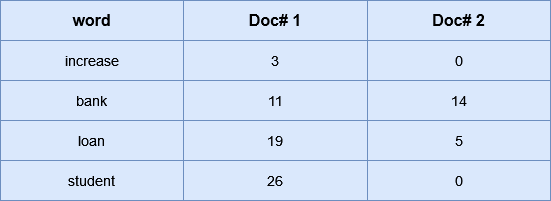

## TF-IDF value  
w
i
j
  increases proportionally to the number of times a word appears in a document and is offset by the number of documents in the corpus that contains the word, which helps to adjust for the fact that some words appear more frequently than others. For example, if the word appears in every document in the collection,  
d
f
i
=
N
 , and  
w
i
j
=
0
 , and those terms would be completely disregarded.

First, let's compute document frequency  
d
f
i
  for each word  
i
 . We can represent it as tensor of size vocab_size. We will limit the number of documents to  
N
=
1000
  to speed up processing. For each input sentence, we compute the set of words (represented by their numbers), and increase the corresponding counter:

In [ ]:
N = 1000
df = torch.zeros(vocab_size)
for _,line in train_dataset[:N]:
    for i in set(encode(line)):
        df[i] += 1

Now that we have document frequencies for each word, we can define tf_idf function that will take a string, and produce TF-IDF vector. We will use to_bow defined above to calculate term frequency vector, and multiply it by inverse document frequency of the corresponding term. Remember that all tensor operations are element-wise, which allows us to implement the whole computation as a tensor formula:

In [ ]:
def tf_idf(s):
    bow = to_bow(s)
    return bow*torch.log((N+1)/(df+1))

print(tf_idf(train_dataset[0][1]))

tensor([0.0000, 0.0000, 0.0363,  ..., 0.0000, 0.0000, 0.0000])


You may have noticed that we used a slightly different formula for TF-IDF, namely  
log
(
N
+
1
d
f
i
+
1
)
  instead of  
log
(
N
d
f
i
)
 . This yields similar results, but prevents division by 0 in those cases when  
d
f
i
=
0
 .
Even though TF-IDF representation calculates different weights to different words according to their importance, it is unable to correctly capture the meaning, largely because the order of words in the sentence is still not taken into account. As the famous linguist J. R. Firth said in 1935, “The complete meaning of a word is always contextual, and no study of meaning apart from context can be taken seriously”. We will learn in the later units how to capture contextual information from text using language modeling.

# Embeddings
In our previous example, we operated on high-dimensional bag-of-words vectors with the length of vocab_size, and we were explicitly converting from low-dimensional positional representation vectors into sparse one-hot representations.

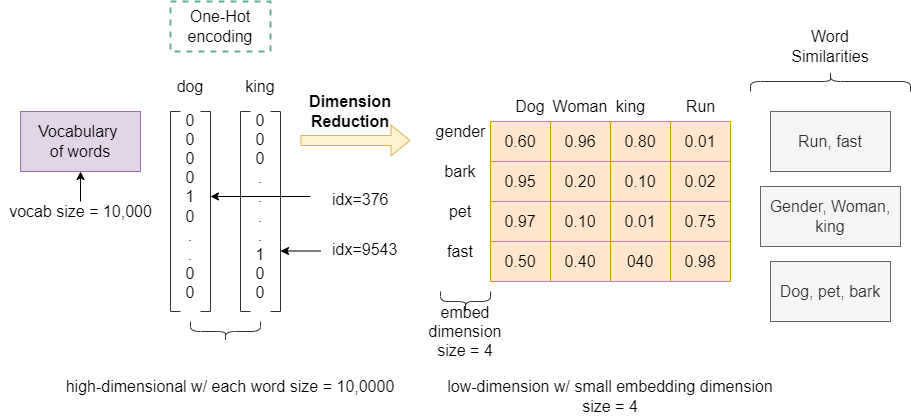

In [ ]:
!wget -q https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/nlp-pytorch/torchnlp.py

In [ ]:
import torch
import torchtext
from torchtext.data import get_tokenizer
import numpy as np
from torchnlp import *
from torchinfo import summary
train_dataset, test_dataset, classes, vocab = load_dataset()

ModuleNotFoundError: ignored

# Dealing with variable sequence size
When working with words, you are going to have text sequences or sentences that are of different lengths. This can be problematic in training the word embeddings neural network. For consistency in the word embedding and improve training performance, we would have to apply some padding. This can be done using the torch.nn.functional.pad on a tokenized dataset. It adds zero values to the empty indices at the end of the vector.

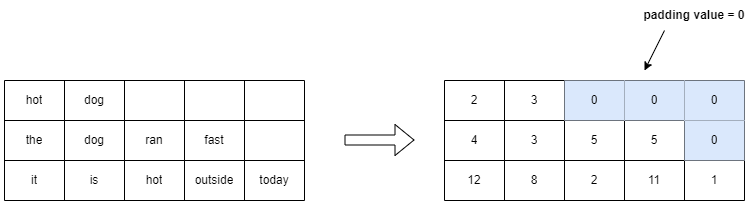

In [ ]:
def padify(b):
    # b is the list of tuples of length batch_size
    #   - first element of a tuple = label, 
    #   - second = feature (text sequence)
    # build vectorized sequence
    v = [encode(x[1]) for x in b]
    # first, compute max length of a sequence in this minibatch
    l = max(map(len,v))
    return ( # tuple of two tensors - labels and features
        torch.LongTensor([t[0]-1 for t in b]),
        torch.stack([torch.nn.functional.pad(torch.tensor(t),(0,l-len(t)),mode='constant',value=0) for t in v])
    )

Let's use the first 2 sentences as example to view the text length differences and effects of padding.

In [ ]:
first_sentence = train_dataset[0][1]
second_sentence = train_dataset[1][1]

f_tokens = encode(first_sentence)
s_tokens = encode(second_sentence)

print(f'First Sentence in dataset:\n{first_sentence}')
print("Length:", len(train_dataset[0][1]))
print(f'\nSecond Sentence in dataset:\n{second_sentence}')
print("Length: ", len(train_dataset[1][1]))

First Sentence in dataset:
Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.
Length: 144

Second Sentence in dataset:
Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.
Length:  266


Let's use the text sequence from the news article headlines in our dataset to change into a tokenize vector. As you will see, the text sequence have different lengths. We'll apply padding so all the text sequence will have a fixed length. This approach is used when you have a large set of text sequences in your dataset.

The length of the 1st and 2nd sentences displayed have difference lengths.
The max length of the dataset tensors is the length of the longest sentence length in the entire dataset.
The zeros are added to the empty indexes in the tensor.

In [ ]:
vocab_size = len(vocab)
labels, features = padify(train_dataset)  
print(f'features: {features}')

print(f'\nlength of first sentence: {len(f_tokens)}')
print(f'length of second sentence: {len(s_tokens)}')
print(f'size of features: {features.size()}')

features: tensor([[  432,   426,     2,  ...,     0,     0,     0],
        [15875,  1073,   855,  ...,     0,     0,     0],
        [   59,     9,   348,  ...,     0,     0,     0],
        ...,
        [ 7736,    63,   665,  ...,     0,     0,     0],
        [   97,    17,    10,  ...,     0,     0,     0],
        [ 2155,   223,  2405,  ...,     0,     0,     0]])

length of first sentence: 29
length of second sentence: 42
size of features: torch.Size([120000, 207])


#What is embedding?
The idea of embedding is the process of mapping words into vectors, which reflects the semantic meaning of a word. The length of its vectors are the embedding dimensions size. We will later discuss how to build meaningful word embeddings, but for now let's just think of embeddings as a way to lower dimensionality of a word vector.

So, embedding layer would take a word as an input, and produce an output vector of specified embedding_size. In a sense, it is very similar to Linear layer, but instead of taking one-hot encoded vector, it will be able to take a word number as an input.

By using embedding layer as a first layer in our network, we can switch from bag-or-words to embedding bag model, where we first convert each word in our text into corresponding embedding, and then compute some aggregate function over all those embeddings, such as sum, average or max.

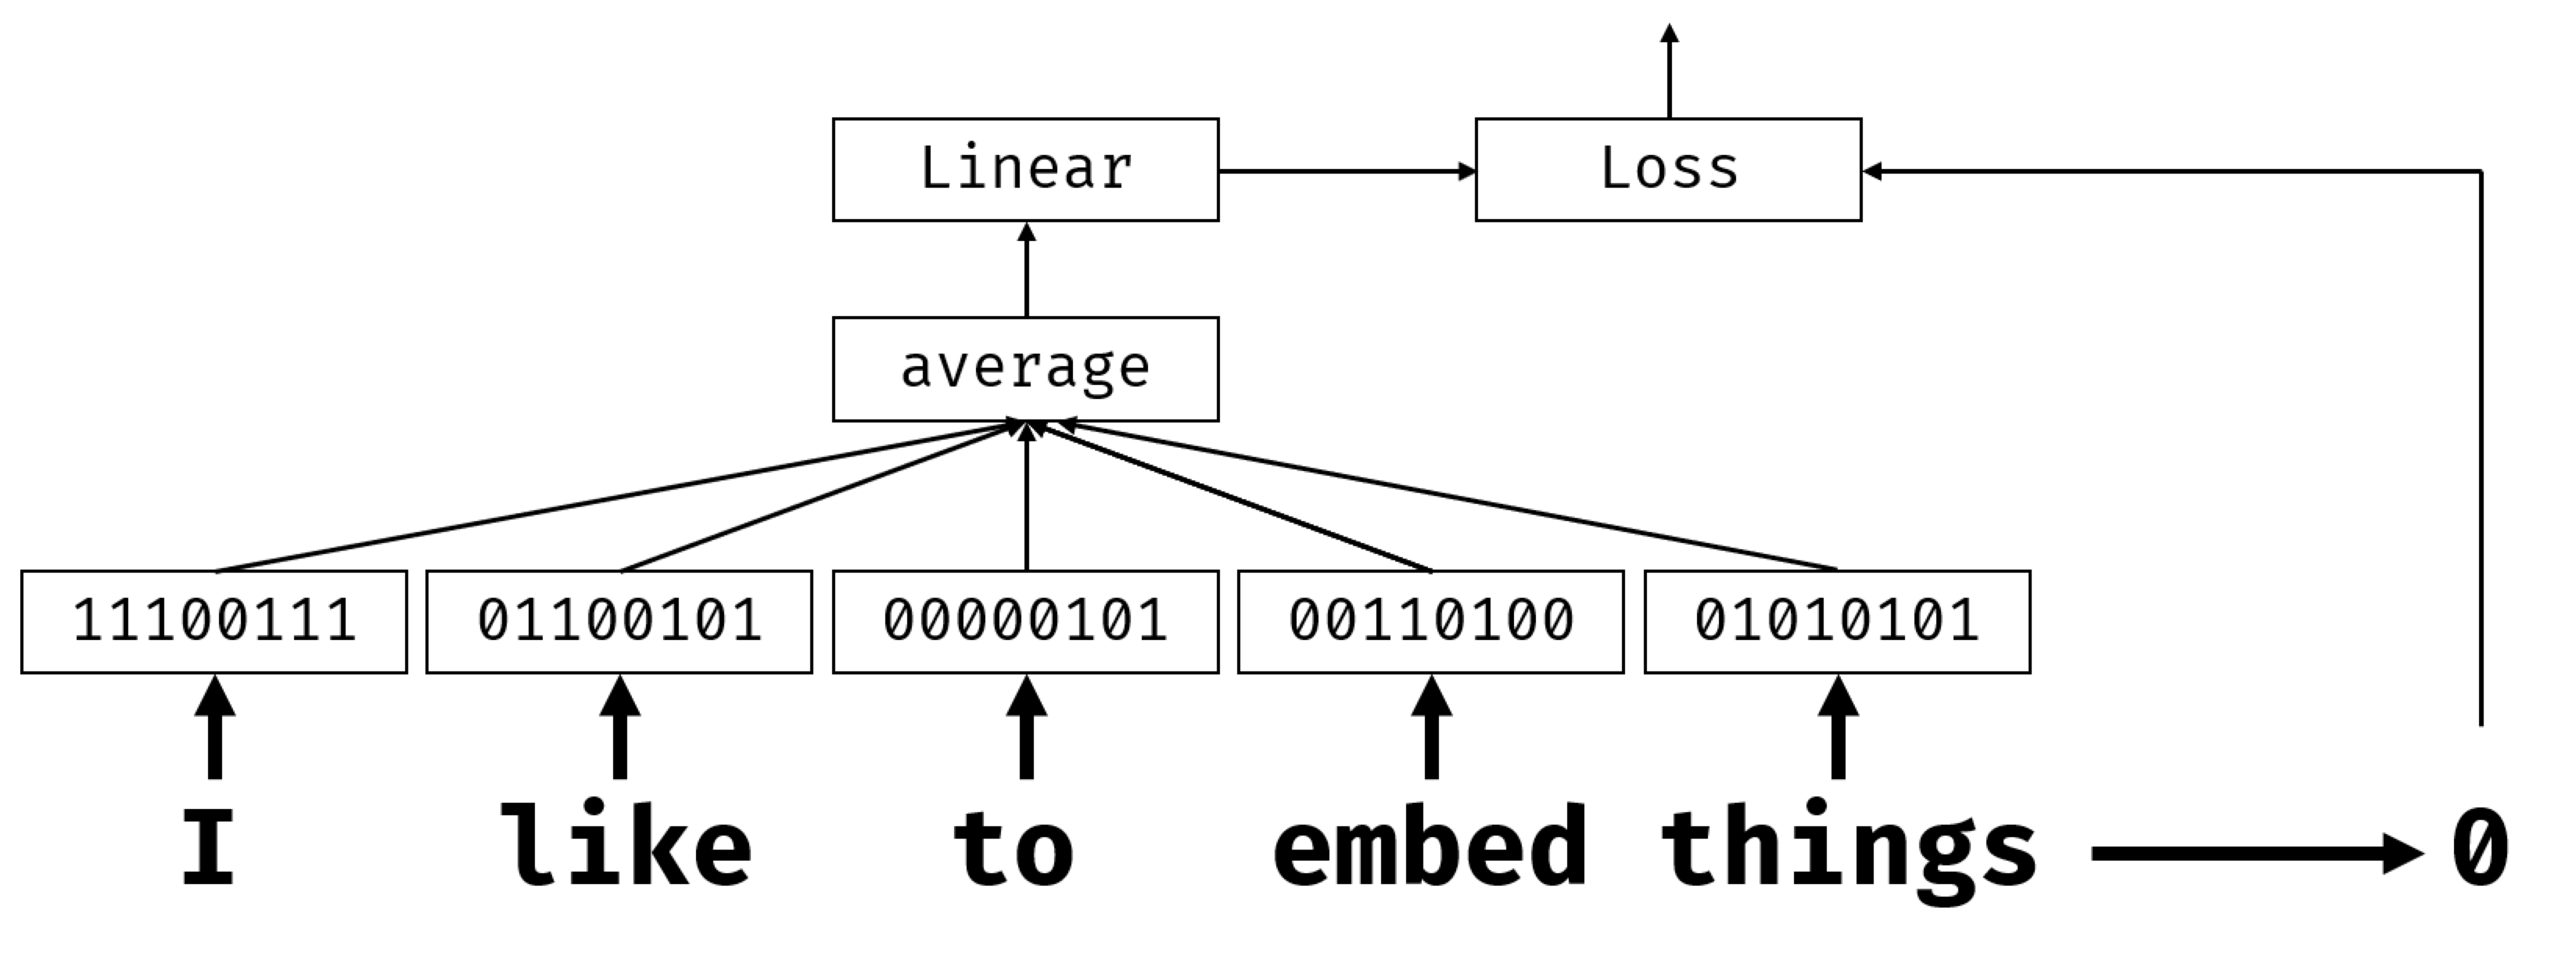

Our classifier neural network will start with an embedding layer, then aggregation layer, and a linear classifier on top of it:

vocab_size are the size of the total number of words we have in our vocabulary.
embed_dim are the length of the word dimensions that show relationships between words passed as in the network.
num_class are the number of news categories we are trying to classify (e.g. World, Sports, Business, Sci/Tech)


In [ ]:
class EmbedClassifier(torch.nn.Module):
    def __init__(self, vocab_size, embed_dim, num_class):
        super().__init__()
        self.embedding = torch.nn.Embedding(vocab_size, embed_dim)
        self.fc = torch.nn.Linear(embed_dim, num_class)

    def forward(self, x):
        x = self.embedding(x)
        x = torch.mean(x,dim=1)
        return self.fc(x)

# Training embedding classifier
Now we’ll define our training dataloader and use the collate_fn to apply the padify function to the datasets as they loaded in each batch. As a result, the training dataset will be padded.



In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=2, collate_fn=padify, shuffle=True)
#train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, collate_fn=padify, shuffle=True)


We can train the model using the training function defined in the previous unit to run the embedding network. The training output serves as a vector lookup store based on the unique index tokens from the vocabulary.

In [ ]:
net = EmbedClassifier(vocab_size,32,len(classes)).to(device)
print(train_loader)
#train_epoch(net, train_loader, lr=1, epoch_size=25000)
train_epoch(net,train_loader, lr=1, epoch_size=25000)

400: acc=0.395
800: acc=0.45
1200: acc=0.49166666666666664
1600: acc=0.516875
2000: acc=0.5475
2400: acc=0.56875


(33.884720348721025, 0.5723421262989609)


Note: We are only training for 25k records here (less than one full epoch) for the sake of time, but you can continue training, write a function to train for several epochs, and experiment with learning rate parameter to achieve higher accuracy. You should be able to go to the accuracy of about 90%.

#EmbeddingBag Layer and Variable-Length Sequence Representation
In the previous architecture, we needed to pad all sequences to the same length in order to fit them into a minibatch. This is not the most efficient way to represent variable length sequences - another apporach would be to use offset vector, which would hold offsets of all sequences stored in one large vector.

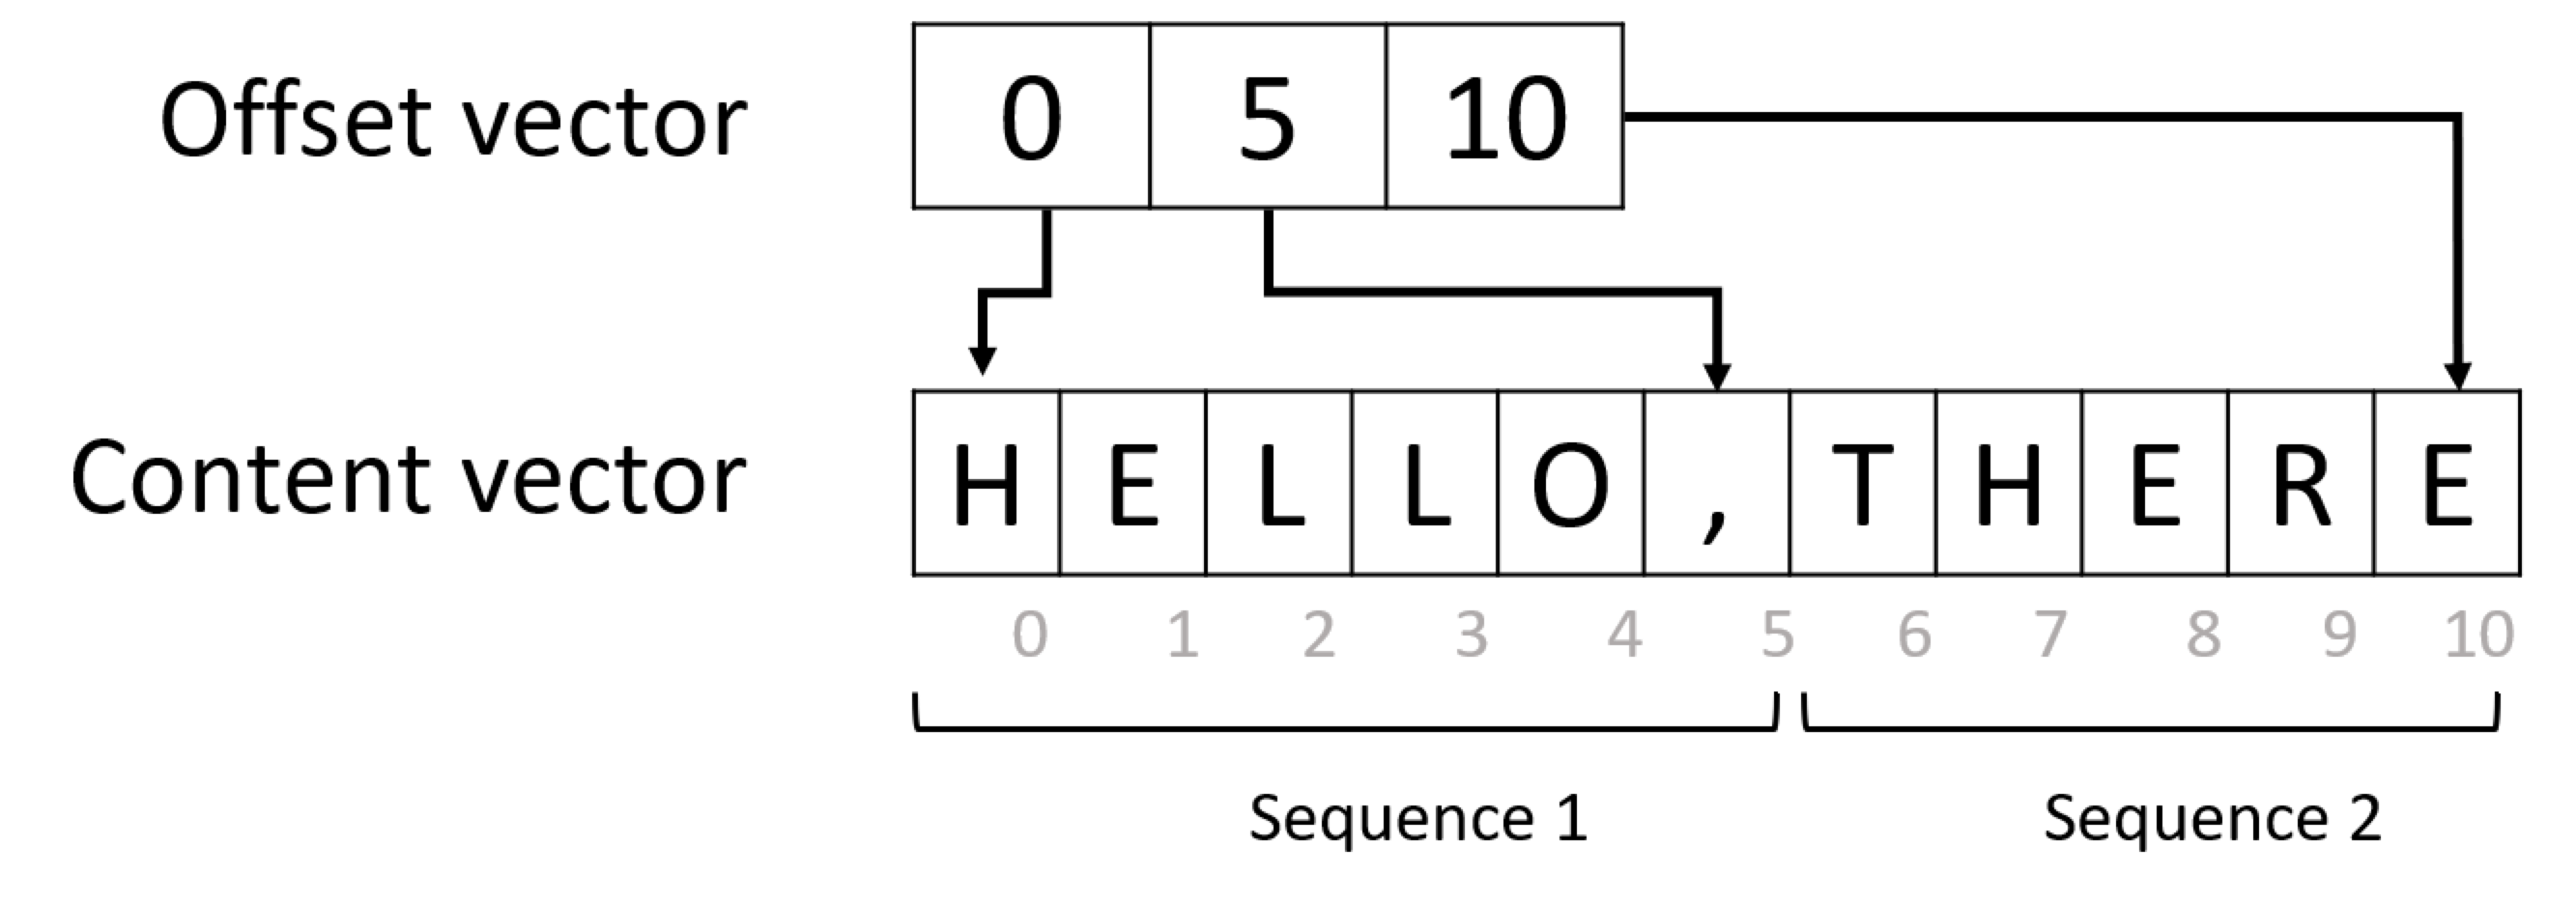

Note: On the picture above, we show a sequence of characters, but in our example we are working with sequences of words. However, the general principle of representing sequences with offset vector remains the same.

To work with offset representation, we use PyTorch's EmbeddingBag layer. It is similar to Embedding, but it takes content vector and offset vector as input, and it also includes averaging layer, which can be mean, sum or max.

Here is modified network that uses EmbeddingBag:

In [ ]:
class EmbedClassifier(torch.nn.Module):
    def __init__(self, vocab_size, embed_dim, num_class):
        super().__init__()
        self.embedding = torch.nn.EmbeddingBag(vocab_size, embed_dim)
        self.fc = torch.nn.Linear(embed_dim, num_class)

    def forward(self, text, off):
        x = self.embedding(text, off)
        return self.fc(x)


To prepare the dataset for training, we need to provide a conversion function that will prepare the offset vector:

In [ ]:
def offsetify(b):
    # first, compute data tensor from all sequences
    x = [torch.tensor(encode(t[1])) for t in b]
    # now, compute the offsets by accumulating the tensor of sequence lengths
    o = [0] + [len(t) for t in x]
    o = torch.tensor(o[:-1]).cumsum(dim=0)
    return ( 
        torch.LongTensor([t[0]-1 for t in b]), # labels
        torch.cat(x), # text 
        o
    )

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, collate_fn=offsetify, shuffle=True)

The offset vector is calculated by first combining the sentences indices into one tensor sequence, then extracting the starting index location of each sentence in the sequence. For example:

The length of the first sentence in our training dataset is 29. Meaning the first index of the offset will be 0.
The length of the second sentence in the dataset is 42. Meaning the second index of the offset will be 29, where the first sentence ended.
The third index of the offset will be 29 + 42 = 71, where the 2nd sentence ended.

In [ ]:
labels, features, offset = offsetify(train_dataset)  
print(f'offset: {offset}')
print(f'\nlength of first sentence: {len(f_tokens)}')
print(f'length of second sentence: {len(s_tokens)}')
print(f'size of data vector: {features.size()}')
print(f'size of offset vector: {offset.size()}')

offset: tensor([      0,      29,      71,  ..., 5193441, 5193488, 5193569])

length of first sentence: 29
length of second sentence: 42
size of data vector: torch.Size([5193609])
size of offset vector: torch.Size([120000])


Note: that unlike in all previous examples, our network now accepts two parameters: data vector and offset vector, which are of different sizes. Similarly, our data loader also provides us with 3 values instead of 2: both text and offset vectors are provided as features. Therefore, we need to slightly adjust our training function to take care of that:

In [ ]:
net = EmbedClassifier(vocab_size,32,len(classes)).to(device)

def train_epoch_emb(net,dataloader,lr=0.01,optimizer=None,loss_fn = torch.nn.CrossEntropyLoss(),epoch_size=None, report_freq=200):
    optimizer = optimizer or torch.optim.Adam(net.parameters(),lr=lr)
    loss_fn = loss_fn.to(device)
    net.train()
    total_loss,acc,count,i = 0,0,0,0
    for labels,text,off in dataloader:
        optimizer.zero_grad()
        labels,text,off = labels.to(device), text.to(device), off.to(device)
        out = net(text, off)
        loss = loss_fn(out,labels) #cross_entropy(out,labels)
        loss.backward()
        optimizer.step()
        total_loss+=loss
        _,predicted = torch.max(out,1)
        acc+=(predicted==labels).sum()
        count+=len(labels)
        i+=1
        if i%report_freq==0:
            print(f"{count}: acc={acc.item()/count}")
        if epoch_size and count>epoch_size:
            break
    return total_loss.item()/count, acc.item()/count


train_epoch_emb(net,train_loader, lr=4, epoch_size=25000)

(6.16282968672495, 0.6155753968253969)

# Semantic Embeddings: Word2Vec
In our previous example, the model embedding layer learnt to map words to vector representation, however, this representation did not have much semantical meaning. It would be nice to learn such vector representation, that similar words or symonims would correspond to vectors that are close to each other in terms of some vector distance (eg. euclidian distance).

To do that, we need to pre-train our embedding model on a large collection of text in a specific way. One of the first ways to train semantic embeddings is called Word2Vec. It helps map the probability of a word, based on the contexts from texts in the sequence. It is based on two main architectures that are used to produce a distributed representation of words:

Continuous bag-of-words (CBoW) — in this architecture, we train the model to predict a word from surrounding context. Given the ngram  
(
W
−
2
,
W
−
1
,
W
0
,
W
1
,
W
2
)
 , the goal of the model is to predict  
W
0
  from  
(
W
−
2
,
W
−
1
,
W
1
,
W
2
)
 . For example: "I like my hot dog on a __". Here the predicted word would be "bun".
Continuous skip-gram is opposite to CBoW. The model uses surrounding window of context words to predict the current word. For example: you can predict dog to be more associated with the word veterinary.
CBoW is faster, while skip-gram is slower, but does a better job of representing infrequent words.



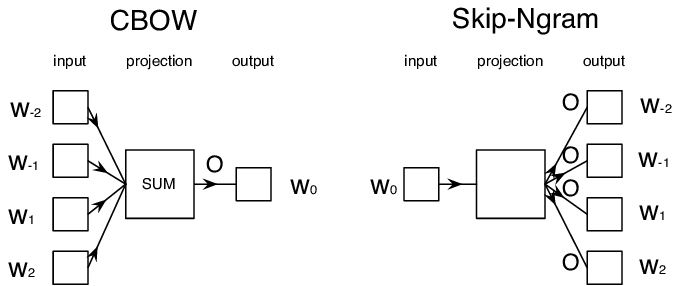

Both CBOW and Skip-Grams are “predictive” embeddings, in that they only take local contexts into account. Word2Vec does not take advantage of global context.

GloVe (Global Vectors) - derives the relationship between words. It determines how often a particular word-pair occurs together in a text by leveraging the idea of co-occurence matrix and uses neural methods to decompose co-occurrence matrix into more expressive and non linear word vectors.
FastText - builds on Word2Vec by learning vector representations for each word and the charachter n-grams found within each word. The values of the representations are then averaged into one vector at each training step. While this adds a lot of additional computation to pre-training, it enables word embeddings to encode sub-word information.
Gensim (Generate Similar) - is an open source NLP Python library that provides a unified interface to build word vectors, corpus, perform topic identification, and other NLP tasks.
FastText and GloVe are other word embeddings techniques that predict the probably of words appearing together.

In our Word2Vec examples, we'll using pre-trained semantic embeddings, but it is interesting to see how those embeddings can be trained using either FastText, CBoW, or Skip-gram architectures. This exercise goes beyond this module, but those interested can reference Word Embeddings tutorials on Pytorch's website.

#Genim
The gensim framework can be used with Pytorch to train most commonly used embeddings in a few lines of code. To experiment with word2vec embedding pre-trained on Google News dataset, we can use the gensim library. Below we find the words that are most similar to 'neural'

In [ ]:
import gensim.downloader as api
w2v = api.load('word2vec-google-news-300')

Let's take a look at words that are similar to 'dog'.

In [ ]:
for w,p in w2v.most_similar('dog'):
    print(f"{w} -> {p}")

dogs -> 0.8680489659309387
puppy -> 0.8106428384780884
pit_bull -> 0.780396044254303
pooch -> 0.7627377510070801
cat -> 0.7609456777572632
golden_retriever -> 0.7500902414321899
German_shepherd -> 0.7465174198150635
Rottweiler -> 0.7437614798545837
beagle -> 0.7418621778488159
pup -> 0.740691065788269



We can also extract vector embeddings from the word, to be used in training classification model (we'll only show first 20 components of the vector for clarity):

In [ ]:
w2v.word_vec('play')[:20]

array([ 0.01226807,  0.06225586,  0.10693359,  0.05810547,  0.23828125,
        0.03686523,  0.05151367, -0.20703125,  0.01989746,  0.10058594,
       -0.03759766, -0.1015625 , -0.15820312, -0.08105469, -0.0390625 ,
       -0.05053711,  0.16015625,  0.2578125 ,  0.10058594, -0.25976562],
      dtype=float32)

The great thing about semantical embeddings is that you can manipulate vector encoding to change the semantics. For example, we can ask to find a word, whose vector representation would be as close as possible to words *king* and *woman*, and as far away from the word *man*:

In [ ]:
w2v.most_similar(positive=['king','woman'],negative=['man'])[0]

('queen', 0.7118192911148071)

#Using Pre-Trained Embeddings in PyTorch
We can modify the example above to pre-populate the matrix in our embedding layer with semantical embeddings, such as Word2Vec. We need to take into account that vocabularies of pre-trained embedding are an addition to the existing text corpus that we already have so they will likely not match. As a result, we will initialize weights for the missing words with random values:

In [ ]:
embed_size = len(w2v.get_vector('hello'))
print(f'Embedding size: {embed_size}')

net = EmbedClassifier(vocab_size,embed_size,len(classes))

print('Populating matrix, this will take some time...',end='')
found, not_found = 0,0
for i,w in enumerate(vocab.itos):
    try:
        net.embedding.weight[i].data = torch.tensor(w2v.get_vector(w))
        found+=1
    except:
        net.embedding.weight[i].data = torch.normal(0.0,1.0,(embed_size,))
        not_found+=1

print(f"Done, found {found} words, {not_found} words missing")
net = net.to(device)

Embedding size: 300
Populating matrix, this will take some time...Done, found 41080 words, 54732 words missing


To prepare the dataset for training, we need to provide a conversion function that will prepare the offset vector:

Now let's train our model. Note that the time it takes to train the model is significantly larger than in the previous example, due to larger embedding layer size, and thus much higher number of parameters. Also, because of this, we may need to train our model on more examples if we want to avoid overfitting

In [ ]:
train_epoch_emb(net,train_loader, lr=4, epoch_size=25000)

(9.964327373201884, 0.7217261904761905)

In our case we do not see a huge increase in accuracy, which is likely due to the quite different vocalularies. To overcome the problem of different vocabularies, we can use one of the following solutions:

Re-train word2vec model on our vocabulary
Load our dataset with the vocabulary from the pre-trained word2vec model. Vocabulary used to load the dataset can be specified during loading.
The latter approach seems easier, especially because PyTorch torchtext framework contains built-in support for embeddings.

#GloVe Embeddings
To load our dataset with the vocabulary from a pre-trained word2vec model, we use Glove embeddings. We'll start by instantiating GloVe-based vocabulary in the following manner:

In [ ]:
vocab = torchtext.vocab.GloVe(name='6B', dim=50)  

.vector_cache/glove.6B.zip: 862MB [02:40, 5.38MB/s]                           
100%|█████████▉| 399999/400000 [00:09<00:00, 44400.81it/s]


## Loaded vocabulary has the following basic operations:

vocab.stoi dictionary allows us to convert word into its dictionary index
vocab.itos does the opposite - converts number into word
vocab.vectors is the array of embedding vectors, so to get the embedding of a word we need to use vocab.vectors[vocab.stoi[s]]
Here is the example of manipulating embeddings to demonstrate the equation kind-man+woman = queen (the coefficient was tweak a bit to make it work):

In [ ]:
# get the vector corresponding to kind-man+woman
qvec = vocab.vectors[vocab.stoi['king']]-vocab.vectors[vocab.stoi['man']]+1.3*vocab.vectors[vocab.stoi['woman']]
# find the index of the closest embedding vector 
d = torch.sum((vocab.vectors-qvec)**2,dim=1)
min_idx = torch.argmin(d)
# find the corresponding word
vocab.itos[min_idx]

'queen'

To train the classifier using those embeddings, we first need to encode our dataset using GloVe vocabulary:

In [ ]:
def offsetify(b):
    # first, compute data tensor from all sequences
    x = [torch.tensor(encode(t[1],voc=vocab)) for t in b] # pass the instance of vocab to encode function!
    # now, compute the offsets by accumulating the tensor of sequence lengths
    o = [0] + [len(t) for t in x]
    o = torch.tensor(o[:-1]).cumsum(dim=0)
    return ( 
        torch.LongTensor([t[0]-1 for t in b]), # labels
        torch.cat(x), # text 
        o
    )

As we have seen above, all vector embeddings are stored in vocab.vectors matrix. It makes it super-easy to load those weights into weights of embedding layer using simple copying:

In [ ]:
net = EmbedClassifier(len(vocab),len(vocab.vectors[0]),len(classes))
net.embedding.weight.data = vocab.vectors
net = net.to(device)

Now let's train our model and see if we get better results:

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, collate_fn=offsetify, shuffle=True)
train_epoch_emb(net,train_loader, lr=4, epoch_size=2000)

(11.651445661272321, 0.6299603174603174)

One of the reasons we are not seeing a significant increase in accuracy is due to the fact that some words from our dataset are missing in the pre-trained GloVe vocabulary, and thus they are essentially ignored. To overcome this fact, we can train our own embeddings on our dataset.

Contextual Embeddings
One key limitation of traditional pretrained embedding representations such as Word2Vec is the problem of word sense and removing ambiguity by making them clear. While pretrained embeddings can capture some of the meaning of words in context, every possible meaning of a word is encoded into the same embedding. This can cause problems in downstream models, since many words such as the word 'play' have different meanings depending on the context they are used in.

For example, the word 'play' in these two different sentences have quite different meaning:

I went to a play at the theatre.
John wants to play with his friends.
The pretrained embeddings above represent both meanings of the word 'play' in the same embedding. To overcome this limitation, we need to build embeddings based on the language model, which is trained on a large corpus of text, and knows how words can be put together in different contexts. Discussing contextual embeddings is out of scope for this tutorial, but we will come back to them when talking about language models in the next unit.

# Capture patterns with recurrent neural networks

Recurrent neural networks
In the previous module, we have been using rich semantic representations of text, and a simple linear classifier on top of the embeddings. What this architecture does is to capture aggregated meaning of words in a sentence, but it does not take into account the order of words, because aggregation operation on top of embeddings removed this information from the original text. Because these models are unable to model word ordering, they cannot solve more complex or ambiguous tasks such as text generation or question answering.

To capture the meaning of text sequence, we need to use another neural network architecture, which is called a recurrent neural network, or RNN. In RNN, we pass our sentence through the network one word vector from a news article sequence at a time, and the network produces some state, which we then pass to the network again with the next one word vector from the sequence. RNN storing a "memory" of the previous in the state, helps the network understand the context of the sentence to be able to predict the network word in the sequence.

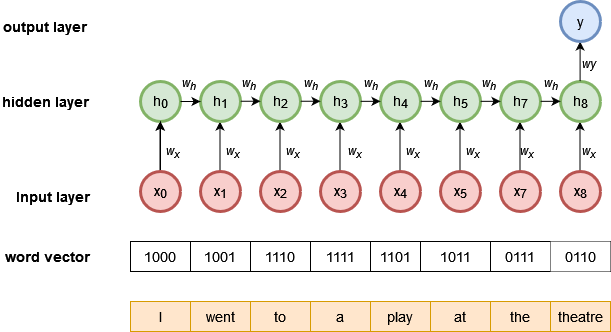

Given the input sequence of word vectors  
X
0
,
…
,
X
n
 , RNN creates a sequence of neural network blocks, and trains this sequence end-to-end using back propagation.
Each network block takes a pair  
(
X
i
,
h
i
)
  as an input, and produces  
h
i
+
1
  as a result.
Final state  
h
n
  or output  
y
  goes into a linear classifier to produce the result.
All network blocks share the same weights, and are trained end-to-end using one backpropagation pass.
The hidden cell containing the current and prior state is calculated with the following formula:

h
(
t
)
=
tanh
(
W
h
h
t
−
1
+
W
x
x
t
+
B
h
)
 
y
(
t
)
=
W
y
h
t
+
B
y
 
Tanh is hyperbolic tangent function, which is defined as  
tanh
(
x
)
=
e
x
−
e
−
x
e
x
+
e
−
x
 
At each network block, weights  
W
x
  are applied to the numeric word vector input value; applying the previous hidden state  
W
h
 ; and the final state  
W
y
 . The  
t
a
n
h
  activation function is applied to the hidden layer to produce values between  
[
−
1
,
1
]
 .

Because state vectors  
h
0
,
…
,
h
n
  are passed through the network, it is able to learn the sequential dependencies between words. For example, when the word not appears somewhere in the sequence, it can learn to negate certain elements within the state vector, resulting in negation.

Let's see how recurrent neural networks can help us classify our news dataset.

if starting from here be sure to install this first

In [ ]:
!pip install -r https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/nlp-pytorch/requirements.txt
!wget -q https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/nlp-pytorch/torchnlp.py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.2 MB 56.0 MB/s 
     |████████████████████████████████| 1.4 MB 8.6 MB/s 
     |████████████████████████████████| 20.1 MB 10.4 MB/s 
     |████████████████████████████████| 50.4 MB 75 kB/s 
     |████████████████████████████████| 1.9 MB 35.3 MB/s 
     |████████████████████████████████| 17.4 MB 388 kB/s 
     |████████████████████████████████| 1.9 MB 57.5 MB/s 
     |████████████████████████████████| 804.1 MB 2.7 kB/s 
     |████████████████████████████████| 3.3 MB 56.0 MB/s 
     |████████████████████████████████| 880 kB 56.7 MB/s 
     |████████████████████████████████| 1.9 MB 50.0 MB/s 
     |████████████████████████████████| 8.0 MB 31.0 MB/s 
     |████████████████████████████████| 8.0 MB 22.5 MB/s 
     |████████████████████████████████| 8.0 MB 17.5 MB/s 
     |████████████████████████████████| 7.6 MB 19.2 MB/s 
     |████████████████████████

In [ ]:
import torch
import torchtext
from torchinfo import summary
from torchnlp import *
train_dataset, test_dataset, classes, vocab = load_dataset()
vocab_size = len(vocab)

Loading dataset...


train.csv: 29.5MB [00:00, 50.6MB/s]
test.csv: 1.86MB [00:00, 36.9MB/s]                  


Building vocab...


## Simple RNN classifier
In the case of simple RNN, each recurrent unit is a simple linear network, which takes concatenated input vector and state vector, and produce a new state vector. PyTorch represents this unit with RNNCell class, and a networks of each cells - as RNN layer.

To define an RNN classifier, we will first apply an embedding layer to lower the dimensionality of input vocabulary, and then have a RNN layer on top of it:

In [ ]:
class RNNClassifier(torch.nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, num_class):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.embedding = torch.nn.Embedding(vocab_size, embed_dim)
        self.rnn = torch.nn.RNN(embed_dim,hidden_dim,batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, num_class)

    def forward(self, x):
        batch_size = x.size(0)
        x = self.embedding(x)
        x,h = self.rnn(x)
        return self.fc(x.mean(dim=1))

Note: We use untrained embedding layer here for simplicity, but for even better results we can use pre-trained embedding layer with Word2Vec or GloVe embeddings, as described in the previous unit. For better understanding, you might want to adapt this code to work with pre-trained embeddings.
In our case, we will use padded data loader, so each batch will have a number of padded sequences of the same length. RNN layer will take the sequence of embedding tensors, and produce two outputs:

The input to the embedding layer is the word sequence or news article
The embedding layer output contains the vector index value in vocab for each word in the sequence
x
  is a sequence of RNN cell outputs at each step.
h
  is a final hidden state for the last element of the sequence. Each RNN hidden layer stores the prior word in the sequence and the current as each word in the sequence is passed through the layers.
We then apply a fully-connected linear classifier to get the probability for number of classes.

Note: RNNs are quite difficult to train, because once the RNN cells are unrolled along the sequence length, the resulting number of layers involved in back propagation is quite large. Thus we need to select small learning rate, and train the network on larger dataset to produce good results. It can take quite a long time, so using GPU is preferred.

In [ ]:
 train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, collate_fn=padify, shuffle=True)
net = RNNClassifier(vocab_size,64,32,len(classes)).to(device)
train_epoch(net,train_loader, lr=0.001)

3200: acc=0.29875
6400: acc=0.37375
9600: acc=0.4528125
12800: acc=0.5109375
16000: acc=0.5535
19200: acc=0.5883333333333334
22400: acc=0.6141071428571429
25600: acc=0.6359765625
28800: acc=0.6540625
32000: acc=0.671375
35200: acc=0.6853977272727273
38400: acc=0.6982291666666667
41600: acc=0.7091105769230769
44800: acc=0.7185267857142857
48000: acc=0.7266875
51200: acc=0.733671875
54400: acc=0.7407904411764706
57600: acc=0.7475520833333333
60800: acc=0.7537828947368421
64000: acc=0.7598125
67200: acc=0.7650892857142857
70400: acc=0.7700284090909091
73600: acc=0.7745652173913044
76800: acc=0.7783854166666667
80000: acc=0.7818375
83200: acc=0.7855889423076923
86400: acc=0.788599537037037
89600: acc=0.7919084821428571
92800: acc=0.7949030172413794
96000: acc=0.79759375
99200: acc=0.8002217741935483
102400: acc=0.802822265625
105600: acc=0.8053977272727273
108800: acc=0.80765625
112000: acc=0.8098035714285714
115200: acc=0.8119791666666667
118400: acc=0.8142989864864865


(0.03229510091145833, 0.815375)

Now, let's load the test dataset to evaluate the trained RNN model. We'll be using the 4 different classes of the news categories to map the predicted output with the targeted label.

In [ ]:
print(f'class map: {classes}')

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, collate_fn=padify, shuffle=True)

class map: ['World', 'Sports', 'Business', 'Sci/Tech']


Before we evaluate the model, we'll extract the padded vector dataset from the dataloader. We will use the vocab.itos function to convert the numeric index to the word it matches in the vocabulary. When conversion from numeric to string happens for padded vectors, the '0' values are set to a special character <unk> as an unknown identifier. So, the character needs to be removed, depending on the unknown values from the padded zeros.

Finally, we’ll run the model with our test dataset to verify if the expected output matched the predicted.

In [ ]:
net.eval()

with torch.no_grad():
    for batch_idx, (target, data) in enumerate(test_loader):
        
        word_lookup = [vocab.itos[w] for w in data[batch_idx]]
        unknow_vals = {'<unk>'}
        word_lookup = [ele for ele in word_lookup if ele not in unknow_vals]
        print('Input text:\n {}\n'.format(word_lookup))
        
        data, target = data.to(device), target.to(device)
        pred = net(data)
        print(torch.argmax(pred[batch_idx]))
        print("Actual:\nvalue={}, class_name= {}\n".format(target[batch_idx], classes[target[batch_idx]]))
        print("Predicted:\nvalue={}, class_name= {}\n".format(pred[0].argmax(0),classes[pred[0].argmax(0)]))
        break

Input text:
 ['with', 'work', ',', 'learns', 'from', "'", '94', 'mistakes', 'nurse', 'teresa', 'has', 'known', 'the', 'woman', 'knitting', 'in', 'the', 'blue', 'reclining', 'chair', 'for', 'months', '.', 'but', 'she', 'asks', 'carolyn', 'her', 'name', 'and', 'birthday', 'anyway', ',', 'as', 'she', 'approaches', 'with', 'chemotherapy', 'for', "'", 's', 'blood', 'cancer', '.', ',', 'a', '17-year', 'nursing', 'veteran', 'at', 'cancer', 'institute', ',', 'isn', "'", 't', 'taking', 'any', 'chances', 'that', 'she', 'is', 'about', 'to', 'give', 'the', 'drug', 'to', 'the', 'wrong', 'patient', '.']

tensor(3, device='cuda:0')
Actual:
value=2, class_name= Business

Predicted:
value=3, class_name= Sci/Tech



# Long Short Term Memory (LSTM)
One of the main problems of classical RNNs is the so-called vanishing gradients problem. Because RNNs are trained end-to-end in one back-propagation pass, it is having hard times propagating error to the first layers of the network, and thus the network cannot learn relationships between distant tokens. The gradient helps in adjusting the weights during back-progagation to achieve better accuracy and reduce the error margin. If the weights are too small the network does not learn. Since the gradient decreases during back-propagation in RNNs, the network does not learn the initial inputs in the network. In other ways, the network "forgets" the earlier word inputs.

One of the ways to avoid this problem is to introduce explicit state management by using so called gates. There are two most known architectures of this kind: Long Short Term Memory (LSTM) and Gated Relay Unit (GRU).

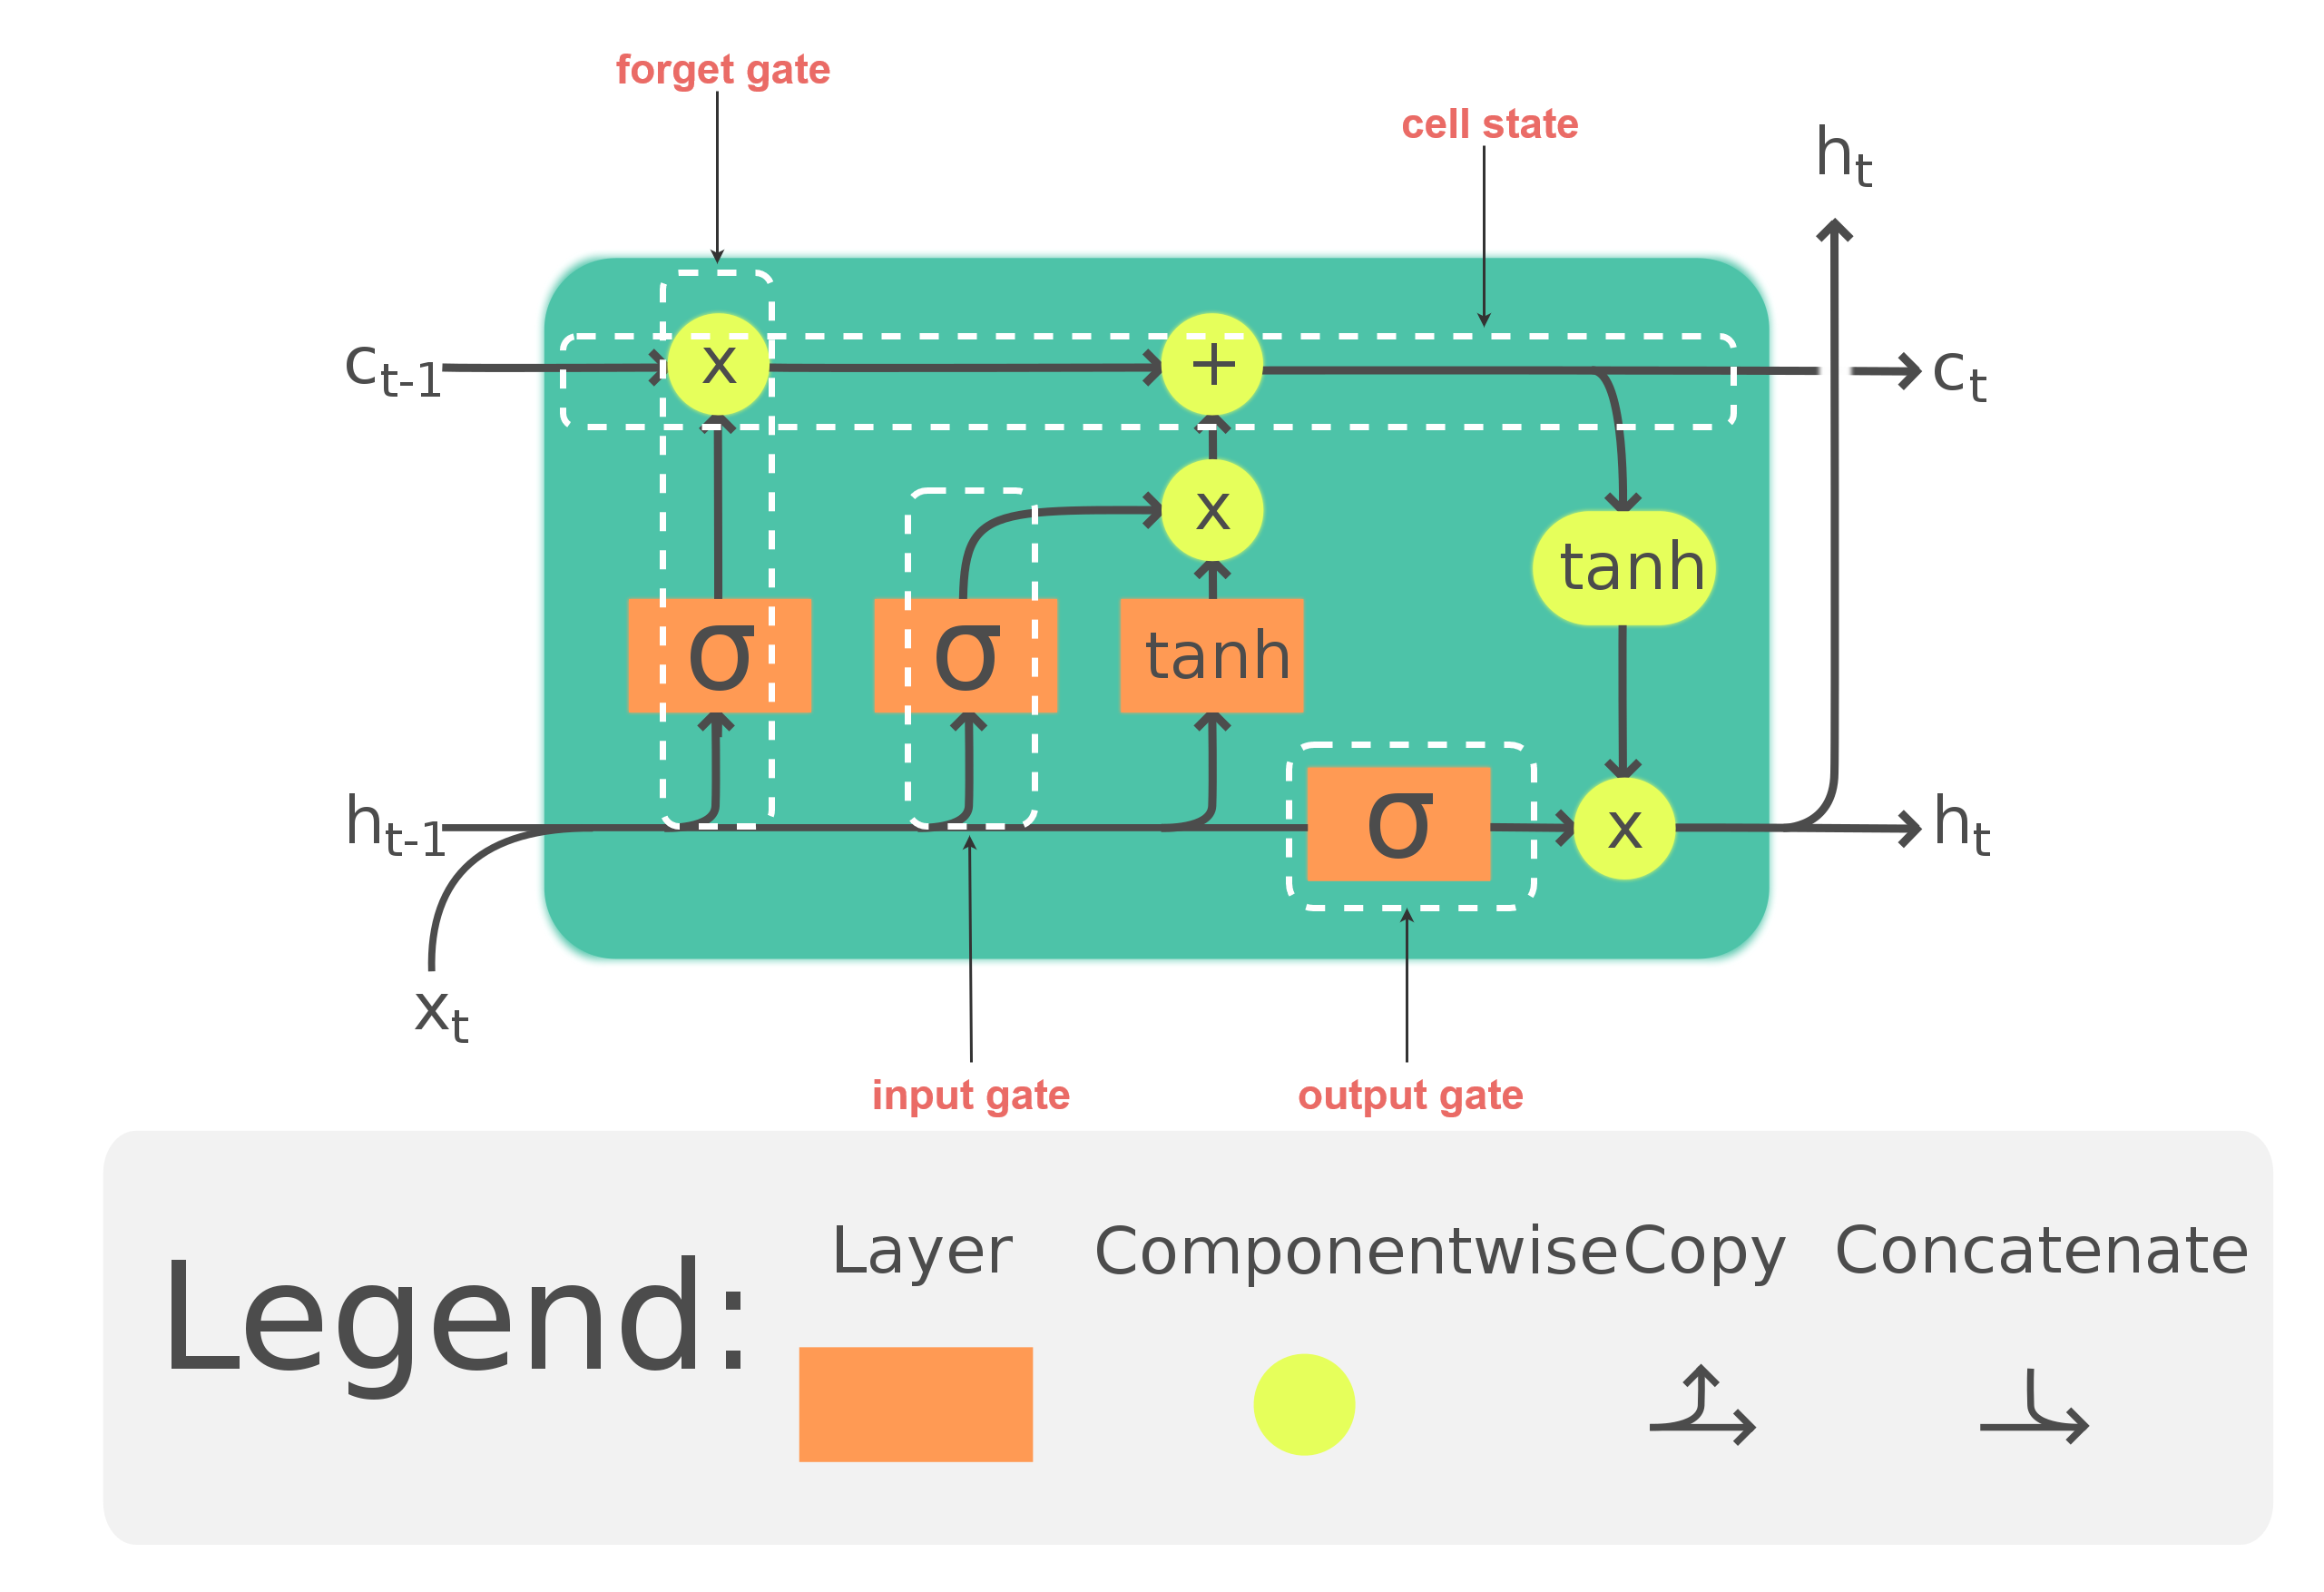


LSTM Network is organized in a manner similar to RNN, but there are two states that are being passed from layer to layer: actual state  
c
 , and hidden vector  
h
 .

At each unit, hidden vector  
h
i
  is concatenated with input  
x
i
 , and they `control what happens to the state  
c
  via gates.
Each gate is a neural network with sigmoid ( 
σ
 ) activation (output in the range  
[
0
,
1
]
 ), which can be thought of as bitwise mask when multiplied by the state vector.
There are the following gates (from left to right on the picture above):

forget gate takes hidden vector and determines, which components of the vector  
c
  we need to forget, and which to pass through. The gate determines which words are not important and sigmod values close to zero need to be thrown out. The formula is  
f
t
=
σ
(
W
f
∗
[
x
t
+
h
t
−
1
]
+
b
f
)
 .
input gate takes some information from the input and hidden vector, and inserts it into state. The formula for the input gate is a product of the new information  
i
t
=
σ
(
W
i
∗
[
x
t
+
h
t
−
1
]
+
b
f
)
  and the hidden  
~
C
t
=
tanh
(
W
f
∗
[
x
t
+
h
t
−
1
]
+
b
f
)
 
output gate transforms state via some linear layer with tanh activation, then selects some of its components using hidden vector  
h
i
  to produce new state  
c
i
+
1
 . The formula for the input gate is  
o
t
=
σ
(
W
o
∗
[
x
t
+
h
t
−
1
]
+
b
f
)
  and the hidden is  
h
t
=
o
t
∗
tanh
(
C
t
)
 
cell state takes a product of the hidden state and the forget gate. Then sums value with the product of the input gate and output gate.  
C
t
=
f
t
∘
C
t
−
1
+
i
t
∘
~
C
t
 
Components of the state  
c
  can be thought of as some flags that can be switched on and off. For example, when we encounter a name 'Alice' in the sequence, we may want to assume that it refers to female character, and raise the flag in the state that we have female noun in the sentence. When we further encounter phrases and Tom, we will raise the flag that we have plural noun. Thus by manipulating state we can supposedly keep track of grammatical properties of sentence parts.

Note: A great resource for understanding internals of LSTM is this great article "Understanding LSTM Networks" by Christopher Olah.
While internal structure of LSTM cell may look complex, PyTorch hides this implementation inside the LSTMCell class, and provides a LSTM object to represent the whole LSTM layer. Thus, implementation of LSTM classifier will be pretty similar to the simple RNN which we have seen above:



In [ ]:
class LSTMClassifier(torch.nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, num_class):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.embedding = torch.nn.Embedding(vocab_size, embed_dim)
        self.embedding.weight.data = torch.randn_like(self.embedding.weight.data)-0.5
        self.rnn = torch.nn.LSTM(embed_dim,hidden_dim,batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, num_class)

    def forward(self, x):
        batch_size = x.size(0)
        x = self.embedding(x)
        x,(h,c) = self.rnn(x)
        return self.fc(h[-1])

Now let's train our network. Note that training LSTM is also quite slow, and you may not seem much raise in accuracy in the beginning of training. Also, you may need to play with lr learning rate parameter to find the learning rate that results in reasonable training speed.

In [ ]:
net = LSTMClassifier(vocab_size,64,32,len(classes)).to(device)
train_epoch(net,train_loader, lr=0.001)

3200: acc=0.2528125
6400: acc=0.261875
9600: acc=0.2782291666666667
12800: acc=0.31625
16000: acc=0.3471875
19200: acc=0.37427083333333333
22400: acc=0.3961160714285714
25600: acc=0.41671875
28800: acc=0.43659722222222225
32000: acc=0.45496875
35200: acc=0.47332386363636364
38400: acc=0.491875
41600: acc=0.5099759615384616
44800: acc=0.5281696428571429
48000: acc=0.5464583333333334
51200: acc=0.5629296875
54400: acc=0.5778860294117647
57600: acc=0.5926041666666667
60800: acc=0.6053618421052631
64000: acc=0.61740625
67200: acc=0.6290029761904762
70400: acc=0.6390625
73600: acc=0.6486277173913043
76800: acc=0.65796875
80000: acc=0.6664
83200: acc=0.6740024038461538
86400: acc=0.6812152777777778
89600: acc=0.6882366071428572
92800: acc=0.694676724137931
96000: acc=0.7007291666666666
99200: acc=0.7064213709677419
102400: acc=0.712021484375
105600: acc=0.7173863636363637
108800: acc=0.7223988970588235
112000: acc=0.7270089285714286
115200: acc=0.7317534722222222
118400: acc=0.73591216216216

(0.0395141357421875, 0.7381)

#Packed sequences
In our example, we had to pad all sequences in the minibatch with zero vectors. While it results in some memory waste, with RNNs it is more critical that additional RNN cells are created for the padded input items, which take part in training, yet do not carry any important input information. It would be much better to train RNN only to the actual sequence size.

To do that, a special format of padded sequence storage is introduced in PyTorch. Suppose we have input padded minibatch which looks like this:

[[1,2,3,4,5],
 [6,7,8,0,0],
 [9,0,0,0,0]]

Here 0 represents padded values, and the actual length vector of input sequences is [5,3,1].

In order to effectively train RNN with padded sequence, we want to begin training first group of RNN cells with large minibatch ([1,6,9]), but then end processing of third sequence, and continue training with shorted minibatches ([2,7], [3,8]), and so on. Thus, packed sequence is represented as one vector - in our case [1,6,9,2,7,3,8,4,5], and length vector ([5,3,1]), from which we can easily reconstruct the original padded minibatch.

To produce packed sequence, we can use torch.nn.utils.rnn.pack_padded_sequence function. All recurrent layers, including RNN, LSTM and GRU, support packed sequences as input, and produce packed output, which can be decoded using torch.nn.utils.rnn.pad_packed_sequence.

To be able to produce packed sequence, we need to pass length vector to the network, and thus we need a different function to prepare minibatches:

In [ ]:
def pad_length(b):
    # build vectorized sequence
    v = [encode(x[1]) for x in b]
    # compute max length of a sequence in this minibatch and length sequence itself
    len_seq = list(map(len,v))
    l = max(len_seq)
    return ( # tuple of three tensors - labels, padded features, length sequence
        torch.LongTensor([t[0]-1 for t in b]),
        torch.stack([torch.nn.functional.pad(torch.tensor(t),(0,l-len(t)),mode='constant',value=0) for t in v]),
        torch.tensor(len_seq)
    )

train_loader_len = torch.utils.data.DataLoader(train_dataset, batch_size=16, collate_fn=pad_length, shuffle=True)
test_loader_len = torch.utils.data.DataLoader(test_dataset, batch_size=16, collate_fn=pad_length, shuffle=True)

The actual network would be very similar to LSTMClassifier above, but forward pass will receive both padded minibatch and the vector of sequence lengths. After computing the embedding, we compute packed sequence, pass it to LSTM layer, and then unpack the result back.

Note: We actually do not use unpacked result x, because we use output from the hidden layers in the following computations. Thus, we can remove the unpacking altogether from this code. The reason we place it here is for you to be able to modify this code easily, in case you should need to use network output in further computations.


In [ ]:
class LSTMPackClassifier(torch.nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, num_class):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.embedding = torch.nn.Embedding(vocab_size, embed_dim)
        self.embedding.weight.data = torch.randn_like(self.embedding.weight.data)-0.5
        self.rnn = torch.nn.LSTM(embed_dim,hidden_dim,batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, num_class)

    def forward(self, x, lengths):
        batch_size = x.size(0)
        x = self.embedding(x)
        pad_x = torch.nn.utils.rnn.pack_padded_sequence(x,lengths,batch_first=True,enforce_sorted=False)
        _,(h,c) = self.rnn(pad_x)
        return self.fc(h[-1])


Now let's train our network with the padded sequence:

In [ ]:
net = LSTMPackClassifier(vocab_size,64,32,len(classes)).to(device)
train_epoch_emb(net,train_loader_len, lr=0.001,use_pack_sequence=True)


3200: acc=0.259375
6400: acc=0.33
9600: acc=0.396875
12800: acc=0.456484375
16000: acc=0.507
19200: acc=0.545625
22400: acc=0.5778571428571428
25600: acc=0.6053515625
28800: acc=0.6278472222222222
32000: acc=0.6483125
35200: acc=0.6640909090909091
38400: acc=0.6789322916666667
41600: acc=0.6915865384615385
44800: acc=0.7031026785714286
48000: acc=0.71325
51200: acc=0.7229296875
54400: acc=0.730625
57600: acc=0.7379340277777777
60800: acc=0.7447203947368422
64000: acc=0.751796875
67200: acc=0.7579315476190476
70400: acc=0.7633948863636364
73600: acc=0.7685326086956522
76800: acc=0.7734505208333333
80000: acc=0.7778125
83200: acc=0.78171875
86400: acc=0.785613425925926
89600: acc=0.7888727678571429
92800: acc=0.7924784482758621
96000: acc=0.7957291666666667
99200: acc=0.7988104838709678
102400: acc=0.801865234375
105600: acc=0.8046496212121212
108800: acc=0.8073345588235294
112000: acc=0.8095535714285714
115200: acc=0.8121614583333333
118400: acc=0.8146537162162162


(0.029700811767578127, 0.8158166666666666)

## Packed sequences
In our example, we had to pad all sequences in the minibatch with zero vectors. While it results in some memory waste, with RNNs it is more critical that additional RNN cells are created for the padded input items, which take part in training, yet do not carry any important input information. It would be much better to train RNN only to the actual sequence size.

To do that, a special format of padded sequence storage is introduced in PyTorch. Suppose we have input padded minibatch which looks like this:

[[1,2,3,4,5],
 [6,7,8,0,0],
 [9,0,0,0,0]]
Here 0 represents padded values, and the actual length vector of input sequences is [5,3,1].

In order to effectively train RNN with padded sequence, we want to begin training first group of RNN cells with large minibatch ([1,6,9]), but then end processing of third sequence, and continue training with shorted minibatches ([2,7], [3,8]), and so on. Thus, packed sequence is represented as one vector - in our case [1,6,9,2,7,3,8,4,5], and length vector ([5,3,1]), from which we can easily reconstruct the original padded minibatch.

To produce packed sequence, we can use torch.nn.utils.rnn.pack_padded_sequence function. All recurrent layers, including RNN, LSTM and GRU, support packed sequences as input, and produce packed output, which can be decoded using torch.nn.utils.rnn.pad_packed_sequence.

To be able to produce packed sequence, we need to pass length vector to the network, and thus we need a different function to prepare minibatches:



In [ ]:
def pad_length(b):
    # build vectorized sequence
    v = [encode(x[1]) for x in b]
    # compute max length of a sequence in this minibatch and length sequence itself
    len_seq = list(map(len,v))
    l = max(len_seq)
    return ( # tuple of three tensors - labels, padded features, length sequence
        torch.LongTensor([t[0]-1 for t in b]),
        torch.stack([torch.nn.functional.pad(torch.tensor(t),(0,l-len(t)),mode='constant',value=0) for t in v]),
        torch.tensor(len_seq)
    )

train_loader_len = torch.utils.data.DataLoader(train_dataset, batch_size=16, collate_fn=pad_length, shuffle=True)
test_loader_len = torch.utils.data.DataLoader(test_dataset, batch_size=16, collate_fn=pad_length, shuffle=True)

The actual network would be very similar to LSTMClassifier above, but forward pass will receive both padded minibatch and the vector of sequence lengths. After computing the embedding, we compute packed sequence, pass it to LSTM layer, and then unpack the result back.

Note: We actually do not use unpacked result x, because we use output from the hidden layers in the following computations. Thus, we can remove the unpacking altogether from this code. The reason we place it here is for you to be able to modify this code easily, in case you should need to use network output in further computations.


In [ ]:
class LSTMPackClassifier(torch.nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, num_class):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.embedding = torch.nn.Embedding(vocab_size, embed_dim)
        self.embedding.weight.data = torch.randn_like(self.embedding.weight.data)-0.5
        self.rnn = torch.nn.LSTM(embed_dim,hidden_dim,batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, num_class)

    def forward(self, x, lengths):
        batch_size = x.size(0)
        x = self.embedding(x)
        pad_x = torch.nn.utils.rnn.pack_padded_sequence(x,lengths,batch_first=True,enforce_sorted=False)
        _,(h,c) = self.rnn(pad_x)
        return self.fc(h[-1])

Now let's train our network with the padded sequence:

In [ ]:
net = LSTMPackClassifier(vocab_size,64,32,len(classes)).to(device)
train_epoch_emb(net,train_loader_len, lr=0.001,use_pack_sequence=True)

3200: acc=0.2996875
6400: acc=0.35390625
9600: acc=0.40989583333333335
12800: acc=0.4634375
16000: acc=0.515
19200: acc=0.5541145833333333
22400: acc=0.5872767857142858
25600: acc=0.6139453125
28800: acc=0.6364236111111111
32000: acc=0.65625
35200: acc=0.6726704545454546
38400: acc=0.6873697916666667
41600: acc=0.7001682692307692
44800: acc=0.7114955357142857
48000: acc=0.7213333333333334
51200: acc=0.73037109375
54400: acc=0.7384742647058824
57600: acc=0.7462326388888889
60800: acc=0.7526151315789473
64000: acc=0.7590625
67200: acc=0.7646577380952381
70400: acc=0.769971590909091
73600: acc=0.7749456521739131
76800: acc=0.7793359375
80000: acc=0.7834875
83200: acc=0.7876442307692307
86400: acc=0.7911689814814815
89600: acc=0.7945982142857143
92800: acc=0.7982650862068965
96000: acc=0.8014583333333334
99200: acc=0.8045060483870968
102400: acc=0.807333984375
105600: acc=0.8100284090909091
108800: acc=0.8125183823529412
112000: acc=0.8148125
115200: acc=0.8170138888888889
118400: acc=0.81

(0.02924527384440104, 0.82015)

Note: You may have noticed the parameter use_pack_sequence that we pass to the training function. Currently, pack_padded_sequence function requires length sequence tensor to be on CPU device, and thus training function needs to avoid moving the length sequence data to GPU when training. You can look into implementation of train_epoch_emb helper function in the torchnlp.py file located in the local directory.

In [ ]:
net.eval()

with torch.no_grad():
    for label,text,off in test_loader_len:
        
        text, label = text.to(device), label.to(device)
        off = off.to('cpu')
        print(f'off value: {off}')
        pred = net(text, off )
        print(f'target {label}')
        y=torch.argmax(pred, dim=1)
        print(f'pred: {y}')
        print("Predicted:\nvalue={}, class_name= {}\n".format(y[0],classes[y[0]]))
        print("Target:\nvalue={}, class_name= {}\n".format(label[0],classes[label[0]]))
        break
     

off value: tensor([91, 48, 46, 45, 36, 40, 64, 29, 38, 30, 39, 34, 71, 28, 51, 47])
target tensor([0, 2, 3, 0, 1, 1, 3, 0, 2, 3, 0, 2, 1, 3, 2, 2], device='cuda:0')
pred: tensor([0, 2, 3, 0, 1, 1, 3, 0, 2, 3, 3, 2, 1, 3, 2, 2], device='cuda:0')
Predicted:
value=0, class_name= World

Target:
value=0, class_name= World



# Bidirectional and multilayer RNNs
In our examples, all recurrent networks operated in one direction, from beginning of a sequence to the end. It looks natural, because it resembles the way we read and listen to speech. However, since in many practical cases we have random access to the input sequence, it might make sense to run recurrent computation in both directions. Such networks are call bidirectional RNNs, and they can be created by passing bidirectional=True parameter to RNN/LSTM/GRU constructor.

Example: self.rnn = torch.nn.LSTM(embed_dim,hidden_dim,batch_first=True, bidrectional=True)
When dealing with bidirectional network, we would need two hidden state vectors, one for each direction. PyTorch encodes those vectors as one vector of twice larger size, which is quite convenient, because you would normally pass the resulting hidden state to fully-connected linear layer, and you would just need to take this increase in size into account when creating the layer.

Recurrent network, one-directional or bidirectional, captures certain patterns within a sequence, and can store them into state vector or pass into output. As with convolutional networks, we can build another recurrent layer on top of the first one to capture higher level patterns, build from low-level patterns extracted by the first layer. This leads us to the notion of multi-layer RNN, which consists of two or more recurrent networks, where output of the previous layer is passed to the next layer as input.



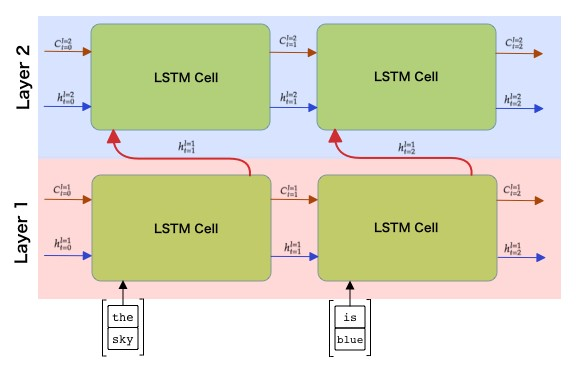

Picture from "From a LSTM cell to a Multilayer LSTM Network with PyTorch" article by Fernando López

PyTorch makes constructing such networks an easy task, because you just need to pass num_layers parameter to RNN/LSTM/GRU constructor to build several layers of recurrence automatically. This would also mean that the size of hidden/state vector would increase proportionally, and you would need to take this into account when handling the output of recurrent layers.

## RNNs for other tasks
In this unit, we have seen that RNNs can be used for sequence classification, but in fact, they can handle many more tasks, such as text generation, machine translation, and more. We will consider those tasks in the next unit.



# Generative Networks
Recurrent Neural Networks (RNNs) and their gated cell variants such as Long Short Term Memory Cells (LSTMs) and Gated Recurrent Units (GRUs) provided a mechanism for language modeling, i.e. they can learn word ordering and provide predictions for next word in a sequence. This allows us to use RNNs for generative tasks, such as ordinary text generation, machine translation, and even image captioning.

In RNN architecture we discussed in the previous unit, each RNN unit produced next next hidden state as an output. However, we can also add another output to each recurrent unit, which would allow us to output a sequence (which is equal in length to the original sequence). Moreover, we can use RNN units that do not accept an input at each step, and just take some initial state vector, and then produce a sequence of outputs.

This allows for different neural architectures that are shown in the picture below:



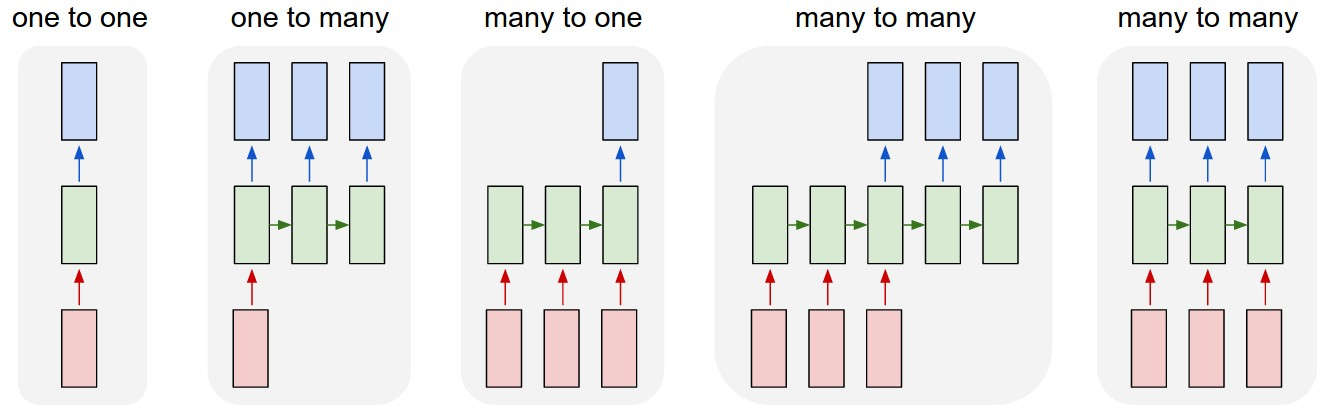

*Image from blog post "Unreasonable Effectiveness of Recurrent Neural Networks" by Andrej Karpaty*
One-to-one is a traditional neural network with one input and one output
One-to-many is a generative architecture that accepts one input value, and generates a sequence of output values. For example, if we want to train image captioning network that would produce a textual description of a picture, we can have a picture as input, pass it through CNN to obtain hidden state, and then have recurrent chain generate caption word-by-word
Many-to-one corresponds to RNN architectures we described in the previous unit, such as text classification
Many-to-many, or sequence-to-sequence corresponds to tasks such as machine translation or language translation, where we have first RNN collect all information from the input sequence into the hidden state, and another RNN chain unrolls this state into the output sequence.
In this unit, we will focus on simple generative models that help us generate text. For simplicity, let's build a character-level network, which generates news articles text letter by letter. While generating news articles may seem quite impractical, the same idea of sequence generation is used in many practical tasks, such as machine translation, text summarization, etc.

During training, we need to take some text corpus, and split it into letter sequences.

if your starting here install this first

In [1]:
!pip install -r https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/nlp-pytorch/requirements.txt
!wget -q https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/nlp-pytorch/torchnlp.py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.2 MB 1.2 MB/s 
     |████████████████████████████████| 1.4 MB 42.7 MB/s 
     |████████████████████████████████| 20.1 MB 952 kB/s 
     |████████████████████████████████| 50.4 MB 40 kB/s 
     |████████████████████████████████| 1.9 MB 58.5 MB/s 
     |████████████████████████████████| 17.4 MB 69.6 MB/s 
     |████████████████████████████████| 1.9 MB 52.8 MB/s 
     |████████████████████████████████| 804.1 MB 2.8 kB/s 
     |████████████████████████████████| 3.3 MB 56.0 MB/s 
     |████████████████████████████████| 880 kB 25.3 MB/s 
     |████████████████████████████████| 1.9 MB 43.7 MB/s 
     |████████████████████████████████| 8.0 MB 31.0 MB/s 
     |████████████████████████████████| 8.0 MB 28.1 MB/s 
     |████████████████████████████████| 8.0 MB 42.5 MB/s 
     |████████████████████████████████| 7.6 MB 31.8 MB/s 
     |████████████████████████

In [2]:
import torch
import torchtext
import numpy as np
from torchnlp import *
train_dataset,test_dataset,classes,vocab = load_dataset()

Loading dataset...


train.csv: 29.5MB [00:00, 65.7MB/s]
test.csv: 1.86MB [00:00, 27.2MB/s]                  


Building vocab...


## Building character Vocabulary
To build character-level generative network, we need to split text into individual characters instead of words. This can be done by defining a different tokenizer. For example:

vocab.stoi - maps token strings in the vacab to a numeric identifier
vocab.itos - maps a number index from the vocab to a string

In [3]:
def char_tokenizer(words):
    return list(words) #[word for word in words]

counter = collections.Counter()
for (label, line) in train_dataset:
    counter.update(char_tokenizer(line))
vocab = torchtext.vocab.Vocab(counter)

vocab_size = len(vocab)
print(f"Vocabulary size = {vocab_size}")
print(f"Encoding of 'a' is {vocab.stoi['a']}")
print(f"Character with code 13 is {vocab.itos[13]}")

Vocabulary size = 84
Encoding of 'a' is 4
Character with code 13 is h



Let's see the example of how we can encode the text from our dataset:

In [4]:
def enc(x):
    return torch.LongTensor(encode(x,voc=vocab,tokenizer=char_tokenizer))

print(f'sample text:\n{train_dataset[0][1]} ')
print(f'\nCharater encoding:\n{enc(train_dataset[0][1])} ')

sample text:
Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again. 

Charater encoding:
tensor([43,  4, 11, 11,  2, 26,  5, 23,  2, 38,  3,  4, 10,  9,  2, 31, 11,  4,
        21,  2, 38,  4, 14, 25,  2, 34,  8,  5,  6,  2,  5, 13,  3,  2, 38, 11,
         4, 14, 25,  2, 55, 37,  3, 15,  5,  3, 10,  9, 56,  2, 37,  3, 15,  5,
         3, 10,  9,  2, 29,  2, 26, 13,  6, 10,  5, 29,  9,  3, 11, 11,  3, 10,
         9, 27,  2, 43,  4, 11, 11,  2, 26,  5, 10,  3,  3,  5, 58,  9,  2, 12,
        21,  7,  8, 12, 11,  7,  8, 18, 61, 22,  4,  8, 12,  2,  6, 19,  2, 15,
        11,  5, 10,  4, 29, 14, 20,  8,  7, 14,  9, 27,  2,  4, 10,  3,  2,  9,
         3,  3,  7,  8, 18,  2, 18, 10,  3,  3,  8,  2,  4, 18,  4,  7,  8, 23]) 


## Training a generative RNN
The way we will train RNN to generate text is the following. On each step, we will take a sequence of characters of length nchars, and ask the network to generate the next output character for each input character:

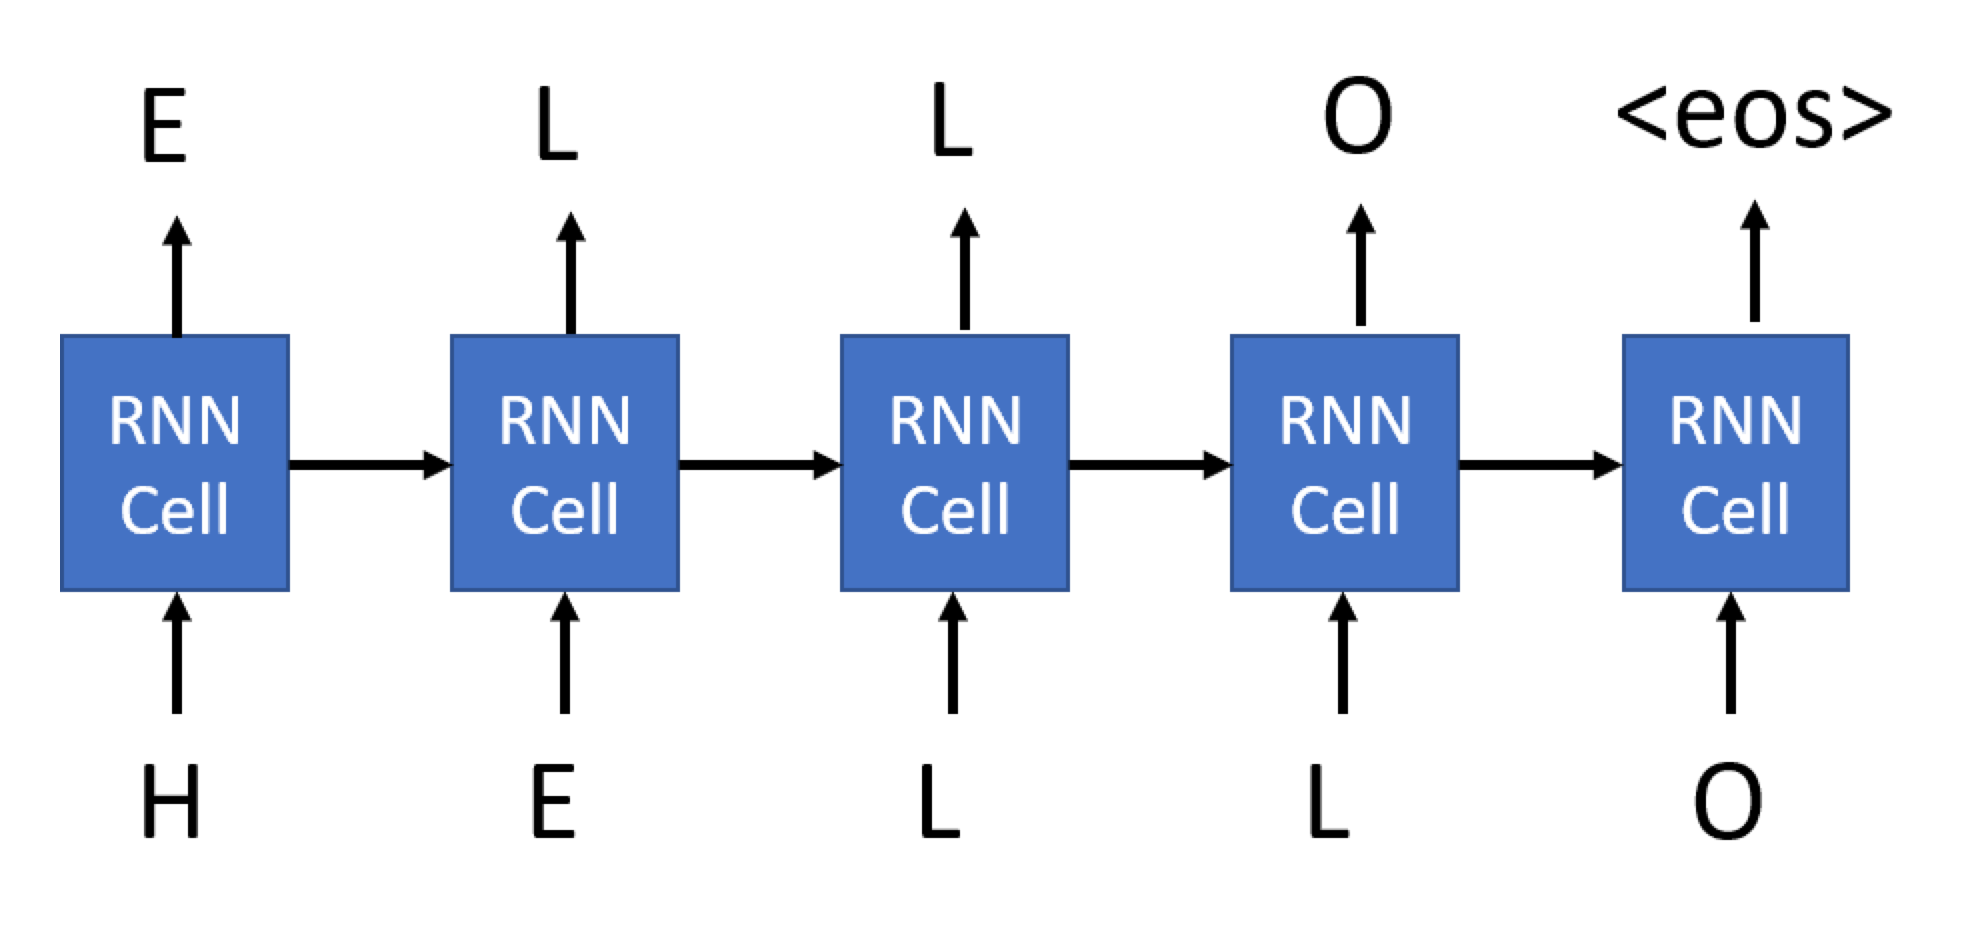


Depending on the actual scenario, we may also want to include some special characters, such as end-of-sequence <eos>. In our case, we just want to train the network for endless text generation, thus we will fix the size of each sequence to be equal to nchars tokens. Consequently, each training example will consist of nchars inputs and nchars outputs (which are input sequence shifted one symbol to the left). Minibatch will consist of several such sequences.

The way we will generate minibatches is to take each news text of length l, and generate all possible input-output combinations from it (there will be l-nchars such combinations). They will form one minibatch, and size of minibatches would be different at each training step.

In [5]:
nchars = 100

def get_batch(s,nchars=nchars):
    ins = torch.zeros(len(s)-nchars,nchars,dtype=torch.long,device=device)
    outs = torch.zeros(len(s)-nchars,nchars,dtype=torch.long,device=device)
    for i in range(len(s)-nchars):
        ins[i] = enc(s[i:i+nchars])
        outs[i] = enc(s[i+1:i+nchars+1])
    return ins,outs

get_batch(train_dataset[0][1])

(tensor([[43,  4, 11,  ..., 18, 61, 22],
         [ 4, 11, 11,  ..., 61, 22,  4],
         [11, 11,  2,  ..., 22,  4,  8],
         ...,
         [37,  3, 15,  ...,  4, 18,  4],
         [ 3, 15,  5,  ..., 18,  4,  7],
         [15,  5,  3,  ...,  4,  7,  8]], device='cuda:0'),
 tensor([[ 4, 11, 11,  ..., 61, 22,  4],
         [11, 11,  2,  ..., 22,  4,  8],
         [11,  2, 26,  ...,  4,  8, 12],
         ...,
         [ 3, 15,  5,  ..., 18,  4,  7],
         [15,  5,  3,  ...,  4,  7,  8],
         [ 5,  3, 10,  ...,  7,  8, 23]], device='cuda:0'))

Now let's define the generative network. It can be based on any recurrent cell which we discussed in the previous unit (simple, LSTM or GRU). In our example we will use LSTM.

Because the network takes characters as input, and vocabulary size is pretty small, we do not need embedding layer, one-hot-encoded input can directly go to LSTM cell. However, because we pass character numbers as input, we need to one-hot-encode them before passing to LSTM. This is done by calling one_hot function during forward pass. Output encoder would be a linear layer that will convert hidden state into one-hot-encoded output.



In [6]:
class LSTMGenerator(torch.nn.Module):
    def __init__(self, vocab_size, hidden_dim):
        super().__init__()
        self.rnn = torch.nn.LSTM(vocab_size,hidden_dim,batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, vocab_size)

    def forward(self, x, s=None):
        x = torch.nn.functional.one_hot(x,vocab_size).to(torch.float32)
        x,s = self.rnn(x,s)
        return self.fc(x),s

During training, we want to be able to sample generated text. To do that, we will define a generate function that will produce an output string of length size, starting from the initial string start.

The way it works is the following:

First, we will pass the whole start string through the network, and take output state s and next predicted character out.
Since out is one-hot encoded, we take argmax to get the index of the character nc in the vocabulary, and use itos to figure out the actual character and append it to the resulting list of characters chars.
This process of generating one character is repeated size times to generate required number of characters.


In [7]:
def generate(net,size=100,start='today '):
        chars = list(start)
        out, s = net(enc(chars).view(1,-1).to(device))
        for i in range(size):
            nc = torch.argmax(out[0][-1])
            chars.append(vocab.itos[nc])
            out, s = net(nc.view(1,-1),s)
        return ''.join(chars)

Now let's do the training! The training loop is almost the same as in all our previous examples, but instead of accuracy we print sampled generated text every 1000 epochs.

Special attention needs to be paid to the way we compute loss. We need to compute loss given one-hot-encoded output out, and expected text text_out, which is the list of character indices. Luckily, the cross_entropy function expects unnormalized network output as first argument, and class number as the second, which is exactly what we have. It also performs automatic averaging over minibatch size.

We also limit the training by samples_to_train samples, in order not to wait for too long. We encourage you to experiment and try longer training, possibly for several epochs (in which case you would need to create another loop around this code).

In [8]:
net = LSTMGenerator(vocab_size,64).to(device)

samples_to_train = 10000
optimizer = torch.optim.Adam(net.parameters(),0.01)
loss_fn = torch.nn.CrossEntropyLoss()
net.train()
for i,x in enumerate(train_dataset):
    # x[0] is class label, x[1] is text
    if len(x[1])-nchars<10:
        continue
    samples_to_train-=1
    if not samples_to_train: break
    text_in, text_out = get_batch(x[1])
    optimizer.zero_grad()
    out,s = net(text_in)
    loss = torch.nn.functional.cross_entropy(out.view(-1,vocab_size),text_out.flatten()) #cross_entropy(out,labels)
    loss.backward()
    optimizer.step()
    if i%1000==0:
        print(f"Current loss = {loss.item()}")
        print(generate(net))  

Current loss = 4.456231117248535
today wswsswsswsswsswsswsswsswsswsswsswsswsswsswsswsswsswsswsswsswsswsswsswsswsswsswsswsswsswsswsswsswssws
Current loss = 2.145665168762207
today the the the the the the the the the the the the the the the the the the the the the the the the the 
Current loss = 1.6459118127822876
today to the the the the the the the the the the the the the the the the the the the the the the the the t
Current loss = 2.4075257778167725
today to the United streased to the United a streased to the United a streased to the United a streased to
Current loss = 1.7003549337387085
today that the company and a profit the first the first the first the first the first the first the first 
Current loss = 1.7857080698013306
today and the U.S. start the for the United with the U.S. start the for the United with the U.S. start the
Current loss = 2.0100083351135254
today and the first the first the first the first the first the first the first the first the first the fi
Current loss = 

This example already generates some pretty good text, but it can be further improved in several ways:

Better minibatch generation. The way we prepared data for training was to generate one minibatch from one sample. This is not ideal, because minibatches are all of different sizes, and some of them even cannot be generated, because the text is smaller than nchars. Also, small minibatches do not load GPU sufficiently enough. It would be wiser to get one large chunk of text from all samples, then generate all input-output pairs, shuffle them, and generate minibatches of equal size.
Multilayer LSTM. It makes sense to try 2 or 3 layers of LSTM cells. As we mentioned in the previous unit, each layer of LSTM extracts certain patterns from text, and in case of character-level generator we can expect lower LSTM level to be responsible for extracting syllables, and higher levels - for words and word combinations. This can be simply implemented by passing number-of-layers parameter to LSTM constructor.
You may also want to experiment with GRU units and see which ones perform better, and with different hidden layer sizes. Too large hidden layer may result in overfitting (e.g. network will learn exact text), and smaller size might not produce good result.


##Soft text generation and temperature
In the previous definition of generate, we were always taking the character with highest probability as the next character in generated text. This resulted in the fact that the text often "cycled" between the same character sequences again and again, like in this example:

today of the second the company and a second the company ...
However, if we look at the probability distribution for the next character, it could be that the difference between a few highest probabilities is not huge, e.g. one character can have probability 0.2, another - 0.19, etc. For example, when looking for the next character in the sequence 'play', next character can equally well be either space, or e (as in the word player).

This leads us to the conclusion that it is not always "fair" to select the character with higher probability, because choosing the second highest might still lead us to meaningful text. It is more wise to sample characters from the probability distribution given by the network output.

This sampling can be done using multinomial function that implements so-called multinomial distribution. A function that implements this soft text generation is defined below:



In [9]:
def generate_soft(net,size=100,start='today ',temperature=1.0):
        chars = list(start)
        out, s = net(enc(chars).view(1,-1).to(device))
        for i in range(size):
            #nc = torch.argmax(out[0][-1])
            out_dist = out[0][-1].div(temperature).exp()
            nc = torch.multinomial(out_dist,1)[0]
            chars.append(vocab.itos[nc])
            out, s = net(nc.view(1,-1),s)
        return ''.join(chars)
    
for i in [0.3,0.8,1.0,1.3,1.8]:
    print(f"--- Temperature = {i}\n{generate_soft(net,size=300,start='Today ',temperature=i)}\n")

--- Temperature = 0.3
Today and the stand and suchip a prove the the said of a the of the contance and the company of the wear the work and a the relost the prove the were the start the the and Wall Software and the work of a the and the start for a the world the the start the the a strect a the has the with the profit the wil

--- Temperature = 0.8
Today spreaton, it the Pallers company the heat a nations of the Iraqi Prap Poste Cindance, tto-acking down of 4000 million whet a second a duils, service the harf in greener to whow probilige the stop a two prefities an way stand the run the with he with Parf and Stawd and Aus Repheria date to years on, 

--- Temperature = 1.0
Today HAHR In a'd in developed hise to user she #39;s shet the frow Scorinits thin for agree 19-nert serdion co nallieh lawsy port progled leggled cutilagroup in Wednesday they his oroalge his has overter share on the (Reuters) - US and the Daull Gamist Legon mon's has could plant a uses hrop a cruding it

--- Temper

We have introduced one more parameter called temperature, which is used to indicate how hard we should stick to the highest probability. If temperature is 1.0, we do fair multinomial sampling, and when temperature goes to infinity - all probabilities become equal, and we randomly select next character. In the example below we can observe that the text becomes meaningless when we increase the temperature too much, and it resembles "cycled" hard-generated text when it becomes closer to 0.